Objective: By analyzing historical loan data and borrower information, we seek to develop a basic understanding of the factors associated with loan default and uncover patterns that can assist in making informed lending decisions.


**Importing Python libraries**

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt 
import matplotlib.style as style 
import seaborn as sns 
import itertools
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt 
#is a powerful library for creating visualizations in Python

import matplotlib.style as style
#module allows you to customize the style and appearance of your plots.

import seaborn as sns 
#It provides additional plotting functionality and attractive styles for statistical data visualization.

import itertools 
#it is a standard Python library that provides various tools for efficient looping and iteration.

%matplotlib inline 
#It enables the inline display of plots generated by matplotlib and seaborn directly within the notebook cell outputs.



# Reading and understanding Data


**Adjusting Jupyter Views**

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)


**Reading Files**

In [4]:
cd= pd.read_csv('/kaggle/input/loan-defaulter/columns_description.csv')
df= pd.read_csv('/kaggle/input/loan-defaulter/application_data.csv')

**Data Description**

In [5]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [6]:
cd[['Row', 'Description']]

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
5,FLAG_OWN_REALTY,Flag if client owns a house or flat
6,CNT_CHILDREN,Number of children the client has
7,AMT_INCOME_TOTAL,Income of the client
8,AMT_CREDIT,Credit amount of the loan
9,AMT_ANNUITY,Loan annuity


In [7]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

**Inspect Data Frames**

In [8]:


# Database dimension
print("Database dimension - applicationDF     :",df.shape)


#Database size
print("Database size - applicationDF          :",df.size)


Database dimension - applicationDF     : (307511, 122)
Database size - applicationDF          : 37516342


In [9]:
df.info(verbose=True)

#verbose=True, the method will display a more detailed summary, including the total count of non-null values for each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [10]:
df.shape[0]

307511

> **Data Validation**

**Dividing the dataset to Categorical and numerical data**

In [11]:
# Select numerical columns
numerical_df = df.select_dtypes(include='number')

# Select categorical columns
categorical_df = df.select_dtypes(include='object')


**Categorical**

In [12]:
# Select categorical columns
categorical_columns = df.select_dtypes(include='object').columns

# Loop through each categorical column and print unique values
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}" '\n')
   


Unique values in column 'NAME_CONTRACT_TYPE': ['Cash loans' 'Revolving loans']

Unique values in column 'CODE_GENDER': ['M' 'F' 'XNA']

Unique values in column 'FLAG_OWN_CAR': ['N' 'Y']

Unique values in column 'FLAG_OWN_REALTY': ['Y' 'N']

Unique values in column 'NAME_TYPE_SUITE': ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Unique values in column 'NAME_INCOME_TYPE': ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Unique values in column 'NAME_EDUCATION_TYPE': ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Unique values in column 'NAME_FAMILY_STATUS': ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']

Unique values in column 'NAME_HOUSING_TYPE': ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']

Un

**Numerical**

In [13]:
# Select numerical columns
numerical_df = df.select_dtypes(include='number')

# Loop through each numerical column and use the describe function
for column in numerical_df.columns:
    print(f"Column: {column}"'\n')
    print(numerical_df[column].describe())
    print("-" * 50)


Column: SK_ID_CURR

count    307511.000000
mean     278180.518577
std      102790.175348
min      100002.000000
25%      189145.500000
50%      278202.000000
75%      367142.500000
max      456255.000000
Name: SK_ID_CURR, dtype: float64
--------------------------------------------------
Column: TARGET

count    307511.000000
mean          0.080729
std           0.272419
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: TARGET, dtype: float64
--------------------------------------------------
Column: CNT_CHILDREN

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64
--------------------------------------------------
Column: AMT_INCOME_TOTAL

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50% 

**Handling invalid data in Categorical Data Frame**

In [14]:
# Define the words you want to replace with NaN for each column
replace_dict = {
    'CODE_GENDER': ['XNA'],    # Replace 'word1', 'word2', and 'word3' in 'Column1'
    'NAME_FAMILY_STATUS': ['Unknown'],
    'ORGANIZATION_TYPE':['XNA'],
    'FONDKAPREMONT_MODE':['not specified']
}

# Replace the specified words with NaN for each column
df.replace(replace_dict, np.nan, inplace=True)


**Handling invalid data in Numerical Data Frame**

In [15]:
df['DAYS_BIRTH']=abs(df['DAYS_BIRTH'])
df['DAYS_REGISTRATION']=abs(df['DAYS_REGISTRATION'])
df['DAYS_ID_PUBLISH']=abs(df['DAYS_ID_PUBLISH'])
df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])

In [16]:
(df[df.DAYS_EMPLOYED==365243.000000]['SK_ID_CURR'].nunique()/df.shape[0])*100

18.00716071945394

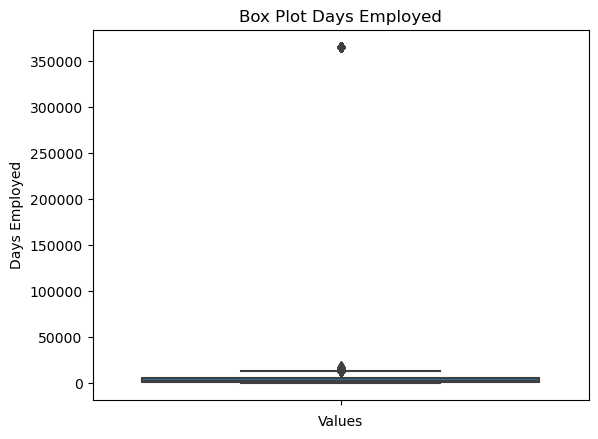

In [17]:

sns.boxplot(y='DAYS_EMPLOYED', data=df)

# Optional: Add labels and title
plt.xlabel('Values')
plt.ylabel('Days Employed')
plt.title('Box Plot Days Employed')

# Show the plot
plt.show()



In [18]:



# Replace the target number with the replacement value in the specified column
df['DAYS_EMPLOYED'].replace(365243.000000, np.nan, inplace=True)



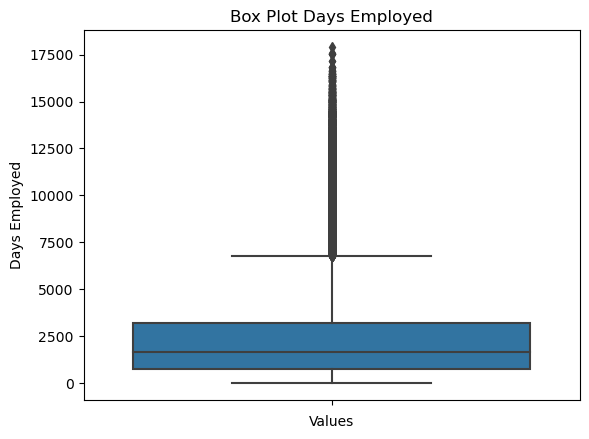

In [19]:
#df['DAYS_EMPLOYED']=abs(df['DAYS_EMPLOYED'])
sns.boxplot(y='DAYS_EMPLOYED', data=df)

# Optional: Add labels and title
plt.xlabel('Values')
plt.ylabel('Days Employed')
plt.title('Box Plot Days Employed')

# Show the plot
plt.show()




**Checking for outliers**

Boxplotting Continuous Data

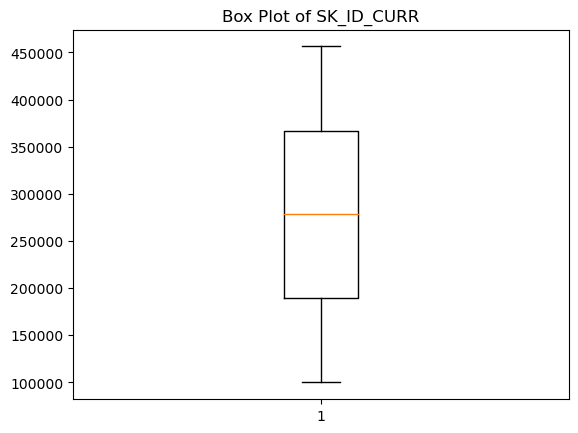

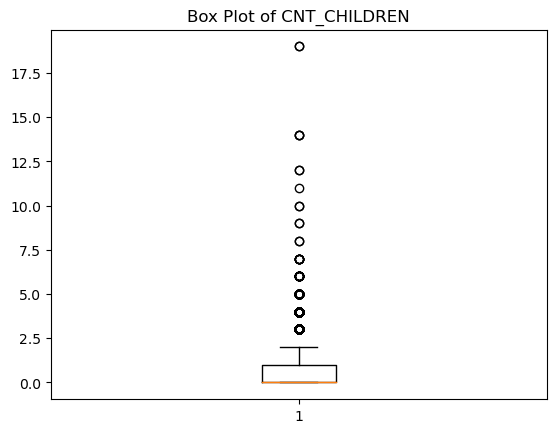

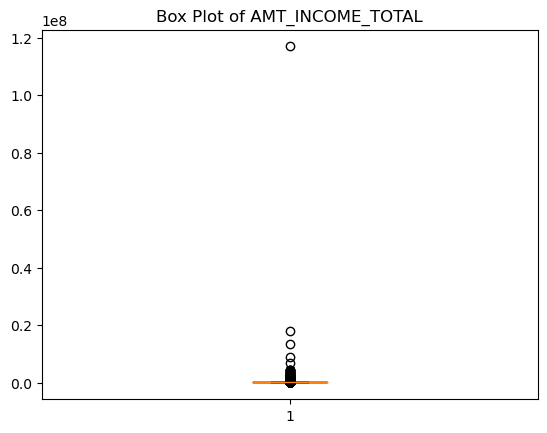

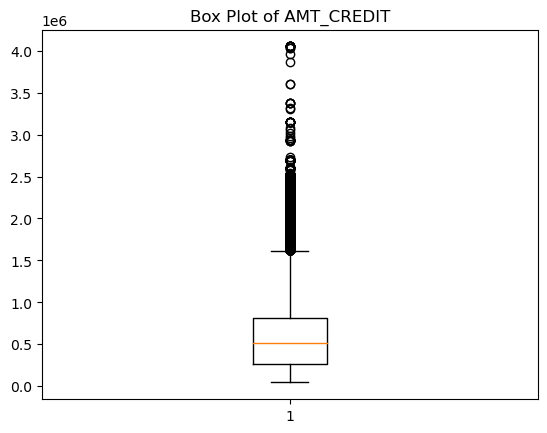

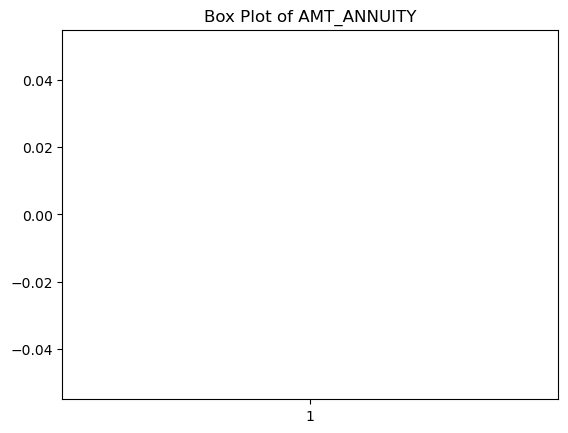

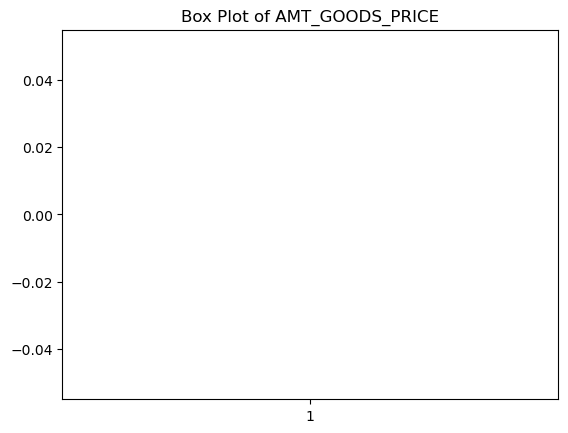

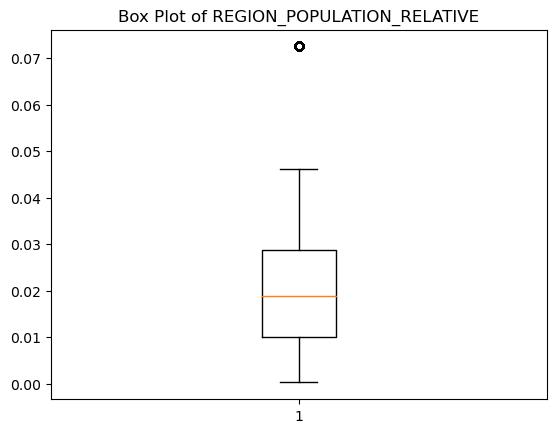

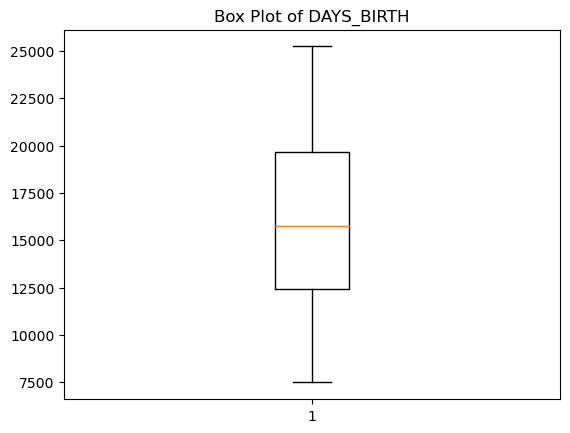

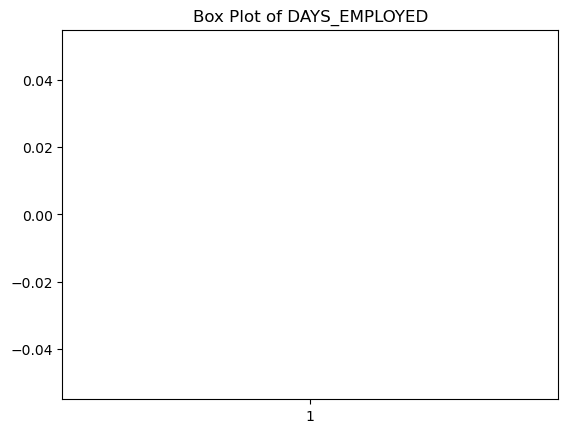

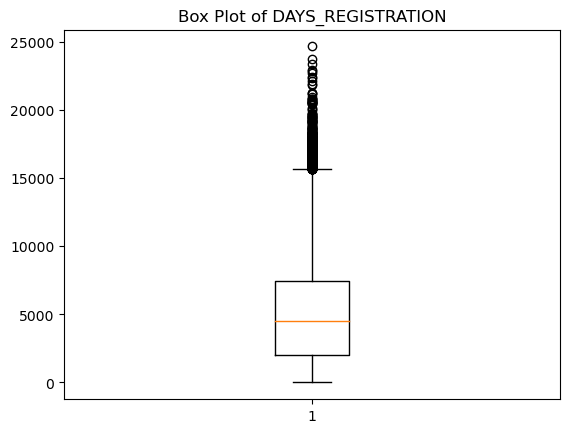

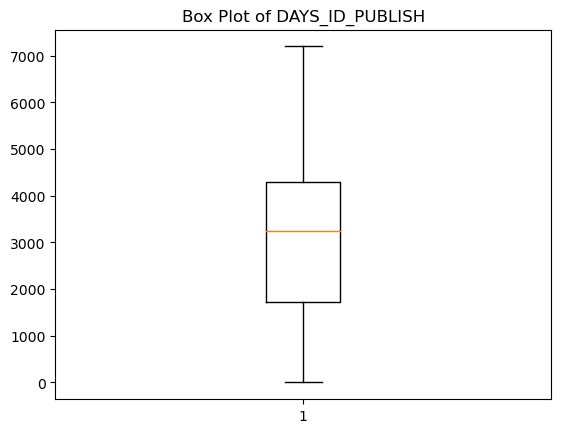

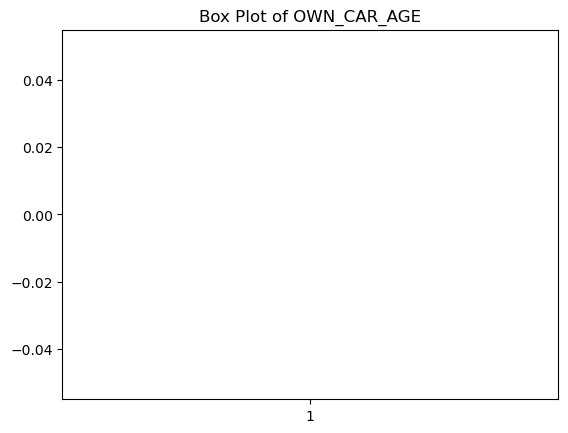

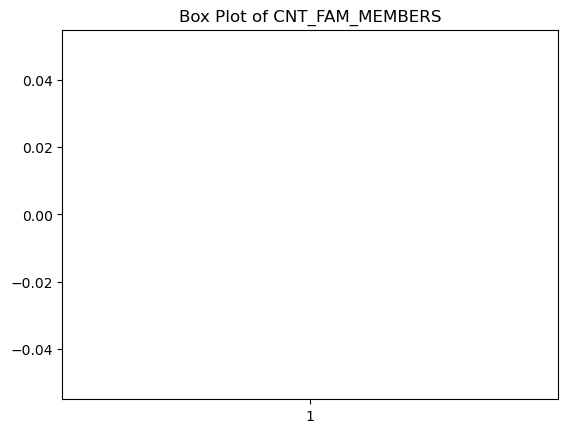

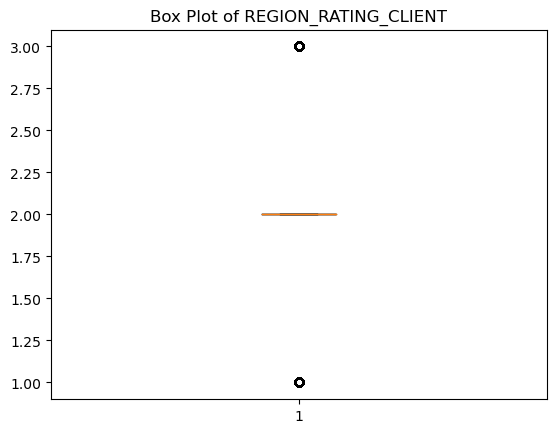

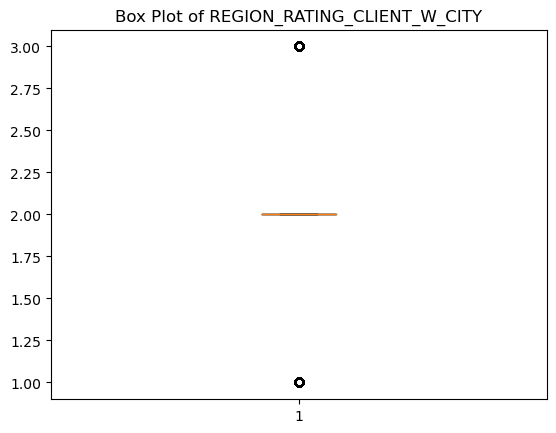

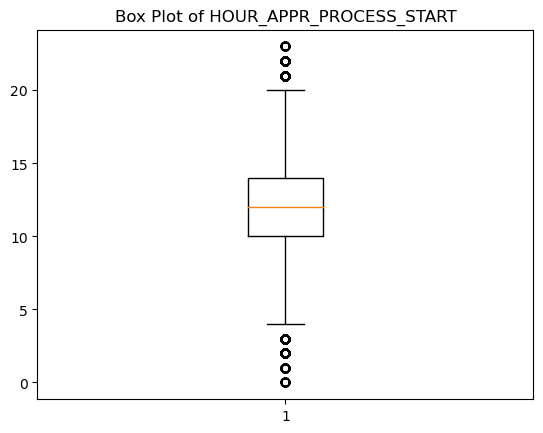

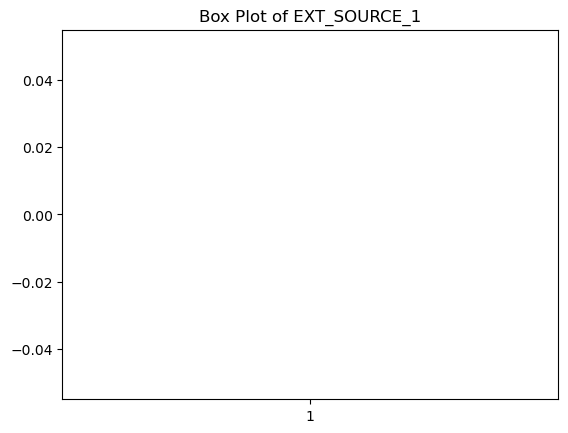

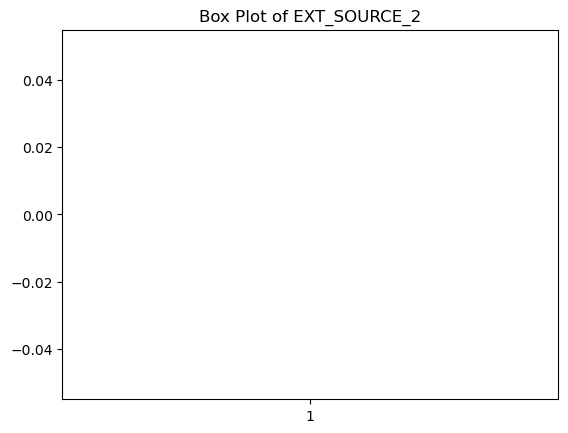

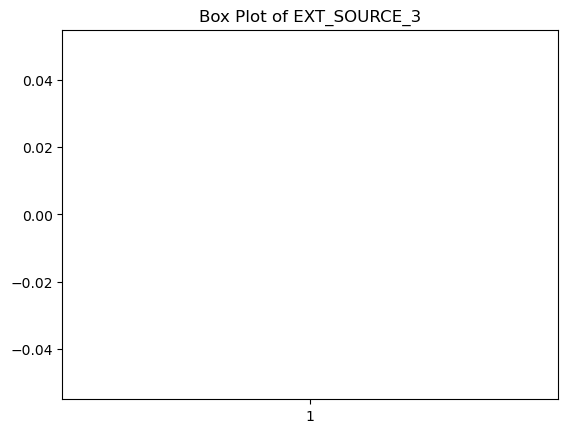

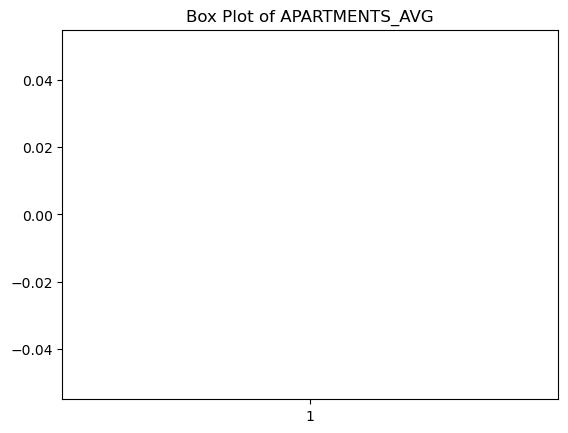

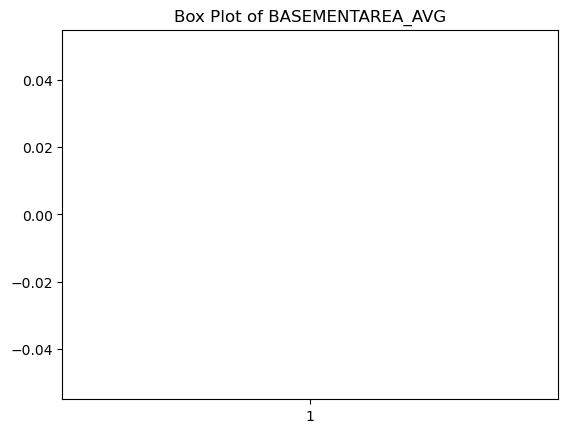

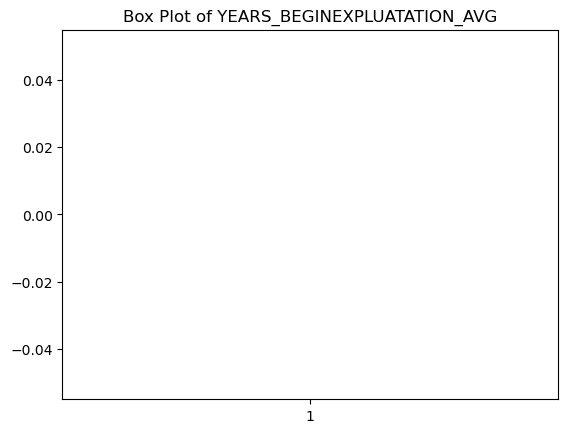

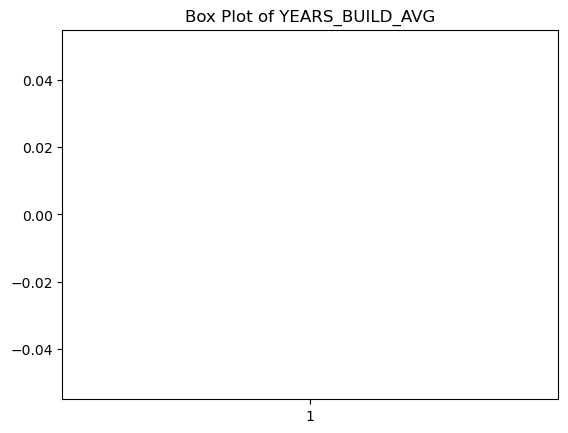

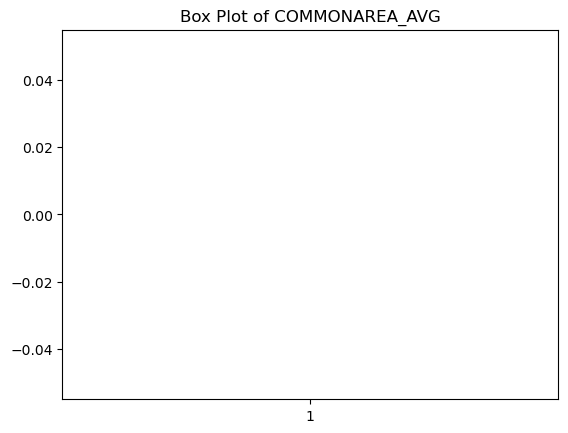

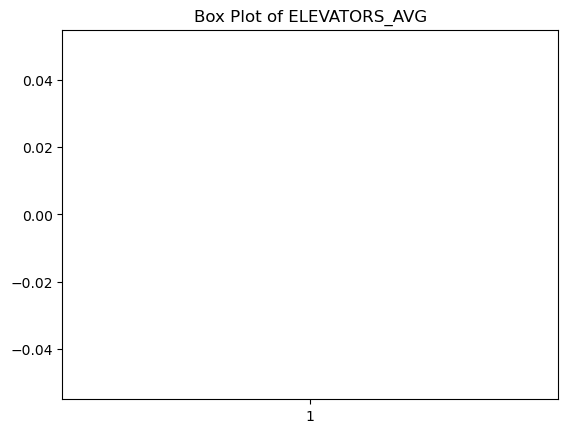

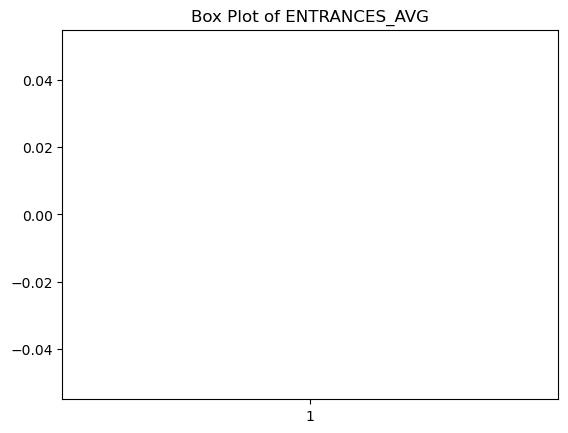

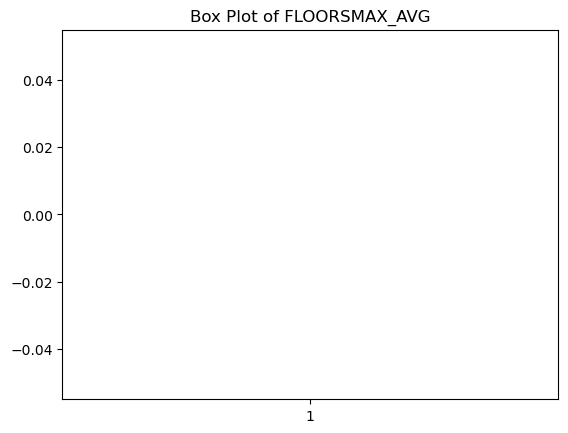

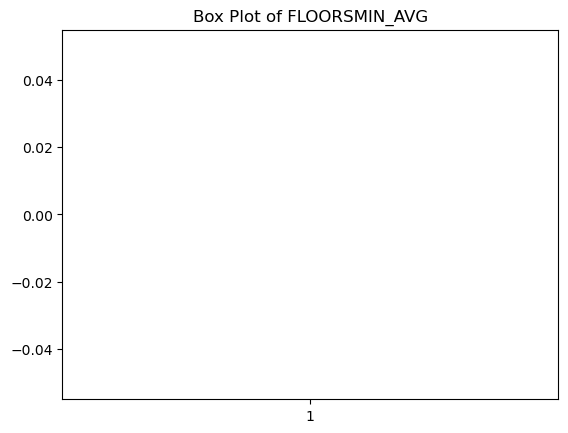

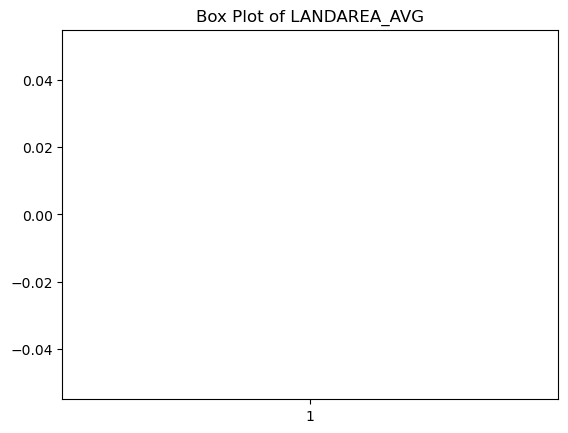

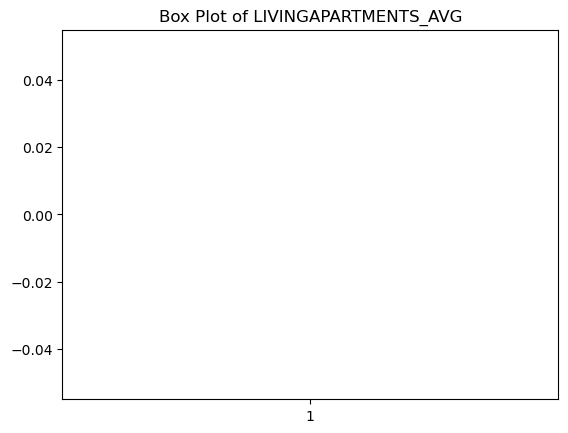

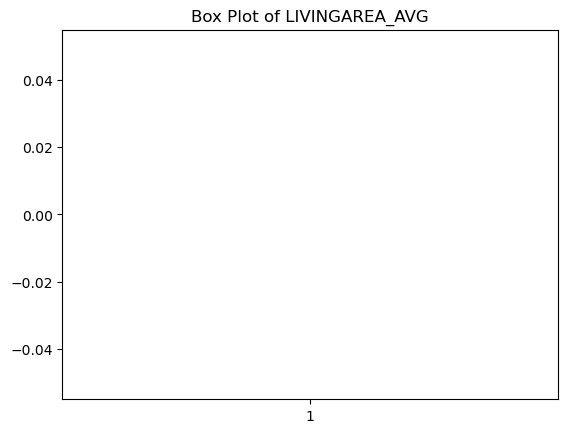

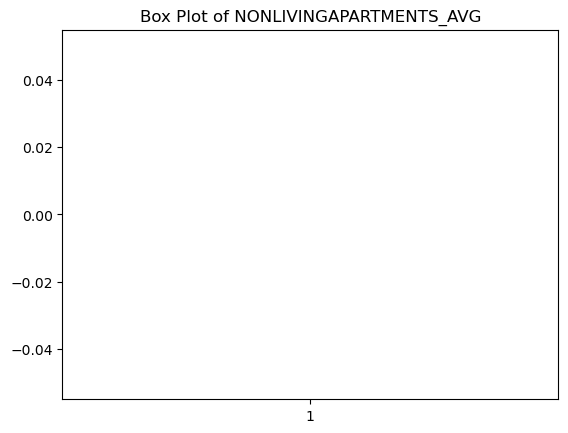

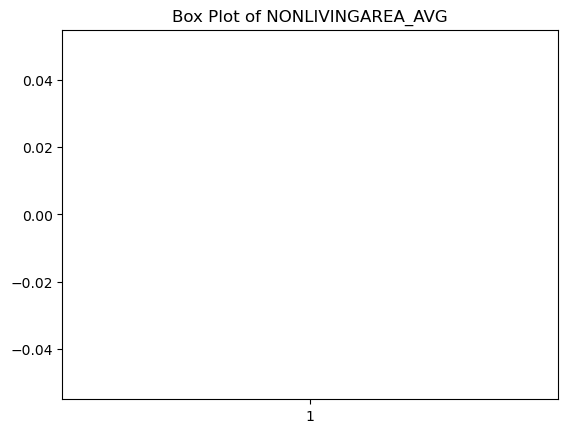

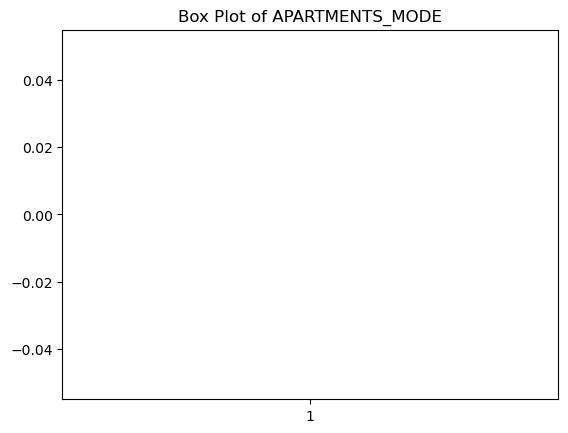

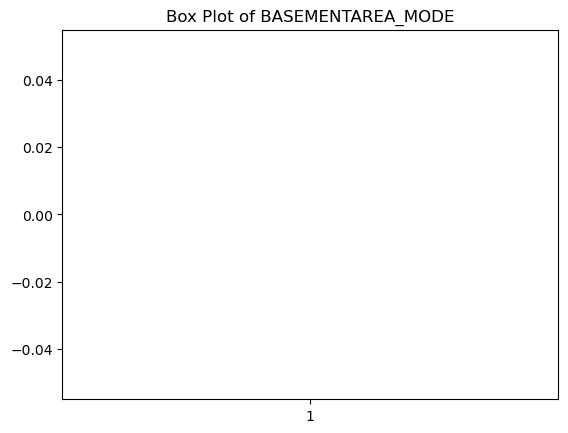

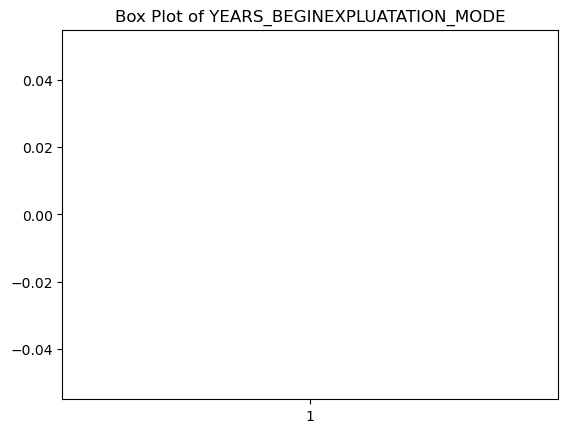

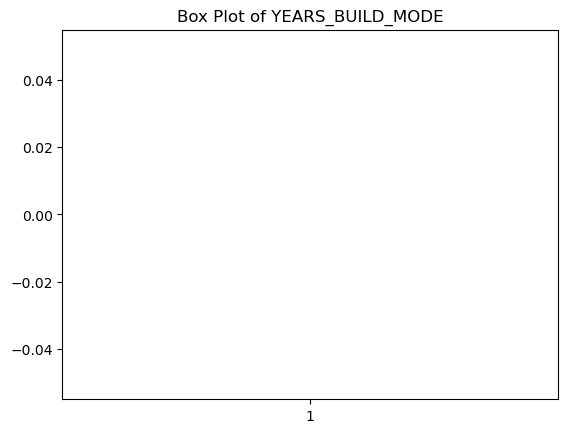

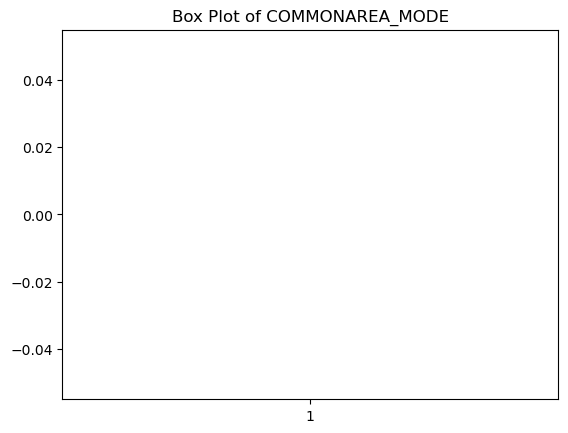

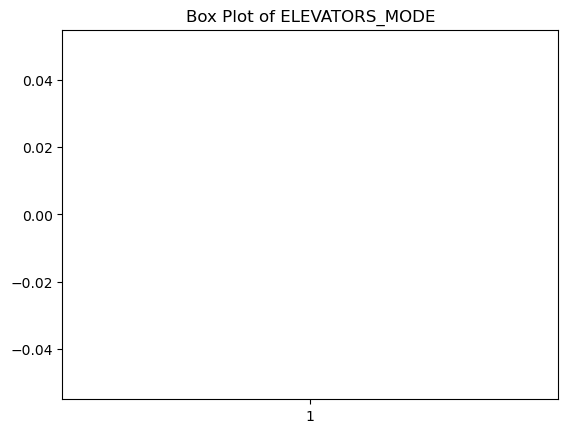

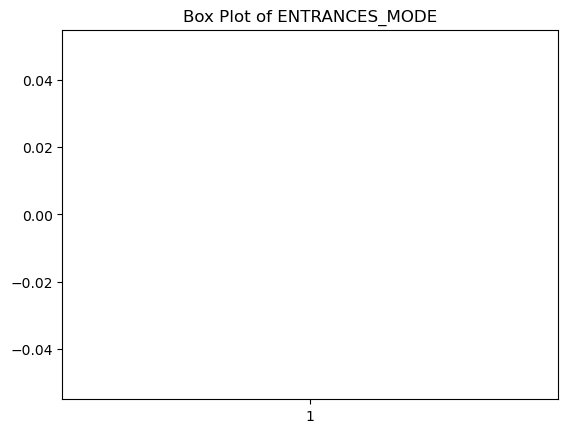

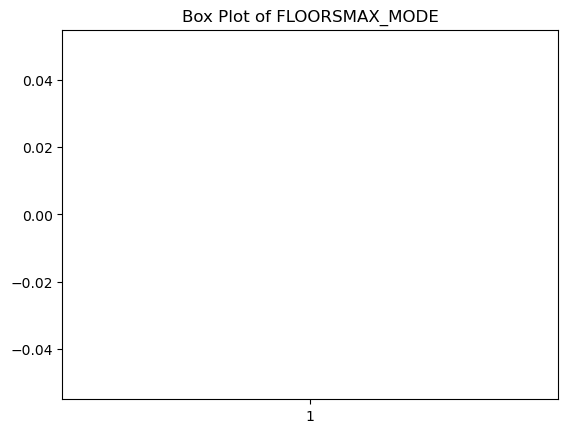

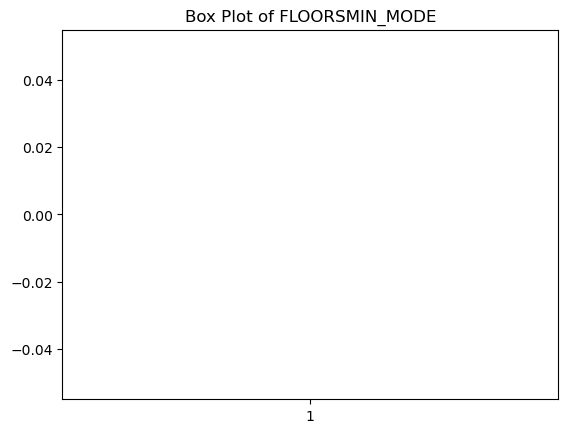

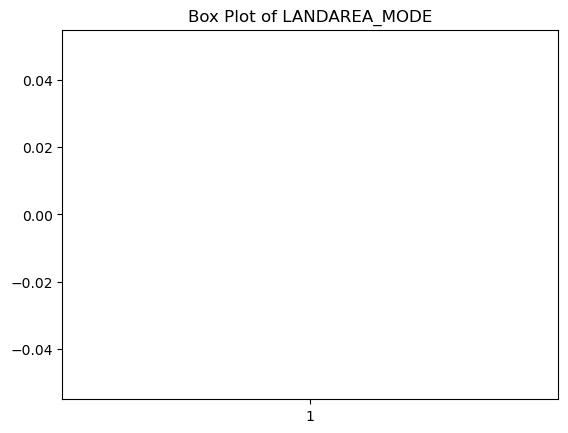

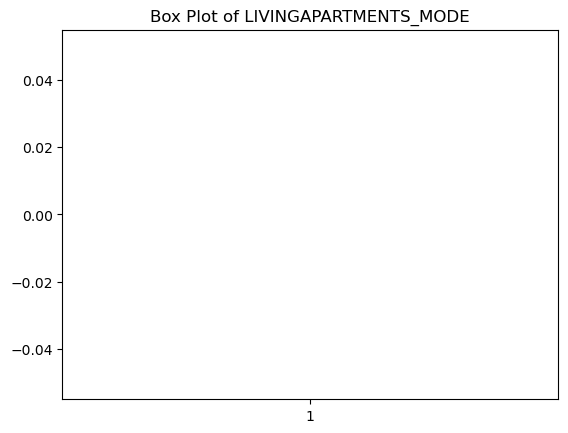

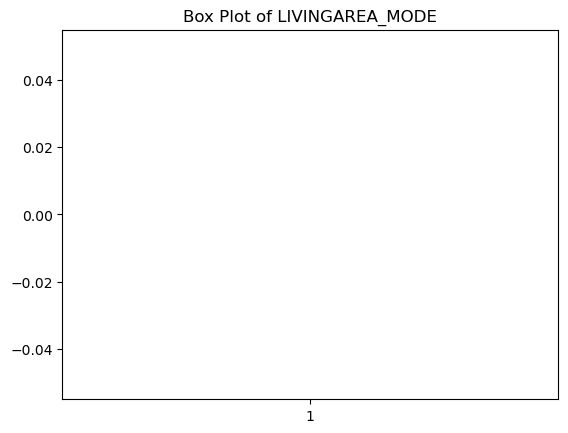

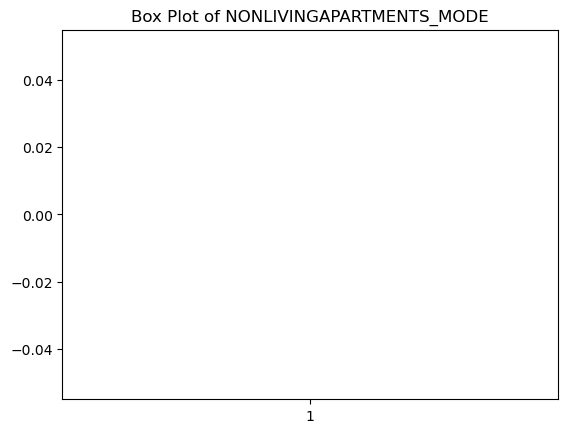

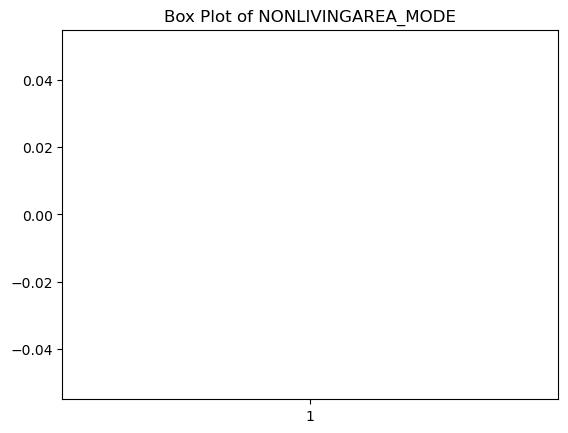

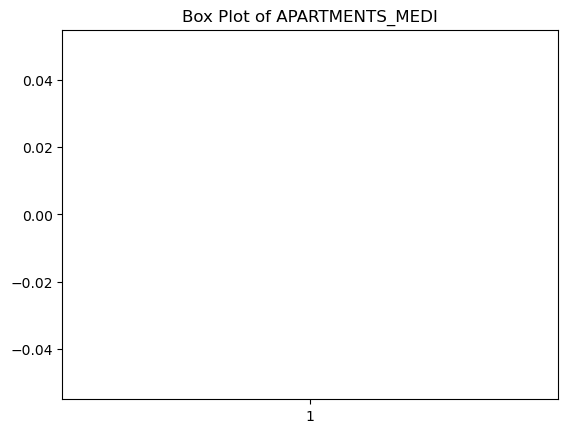

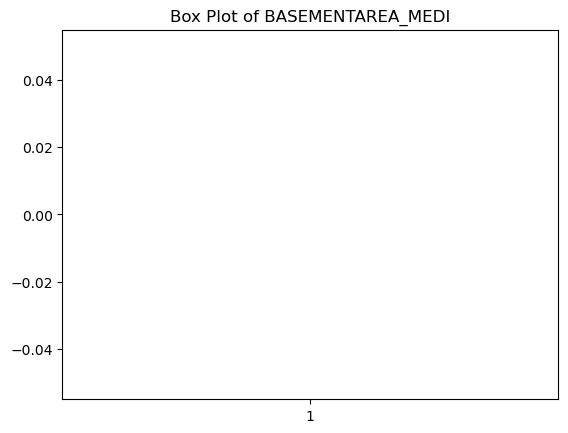

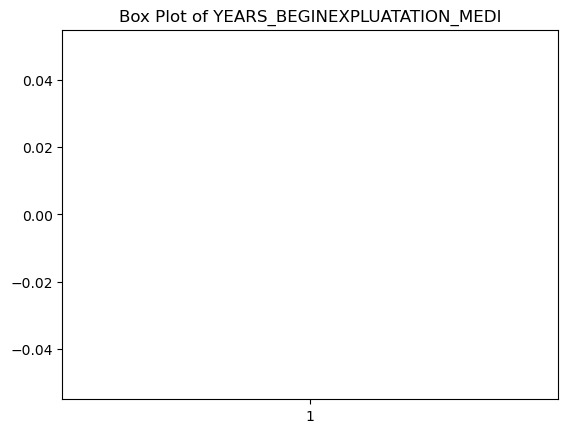

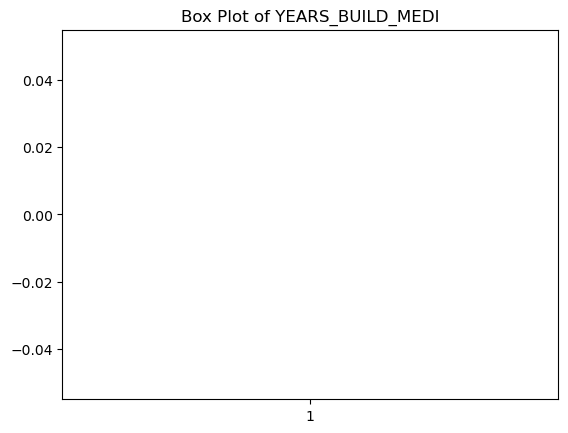

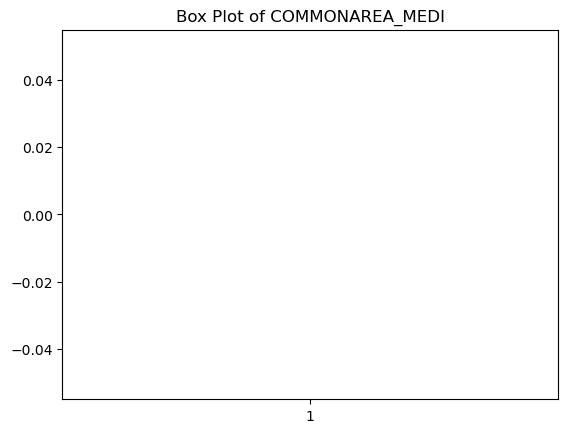

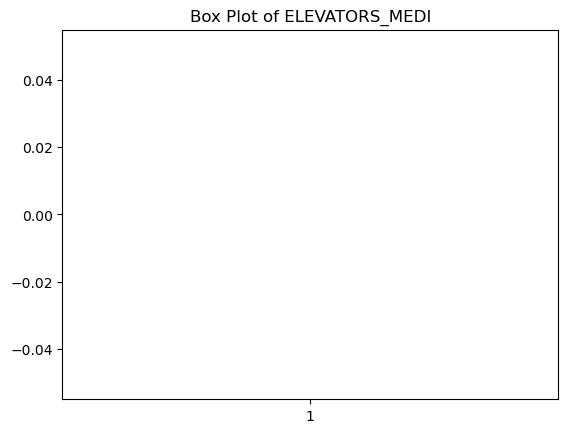

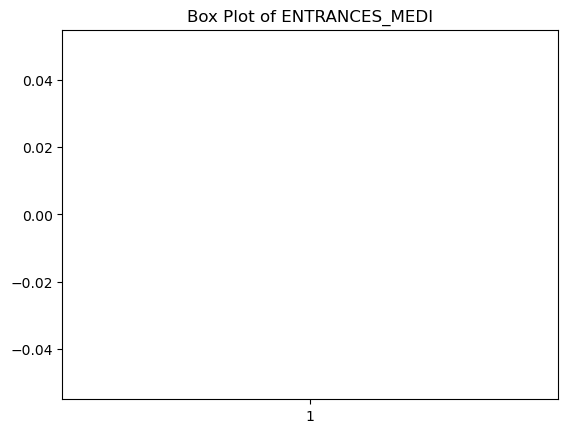

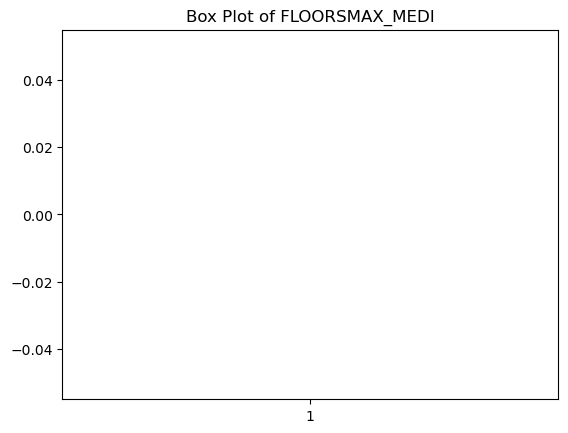

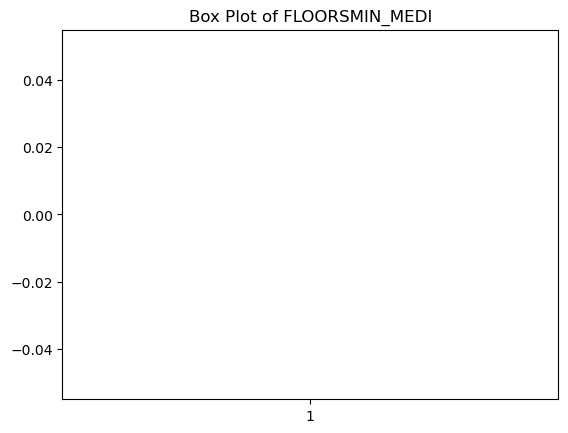

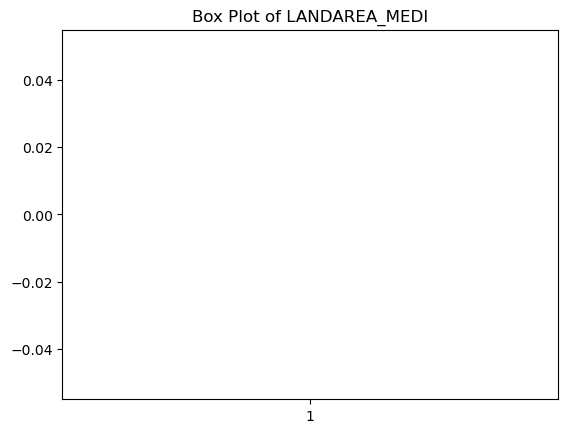

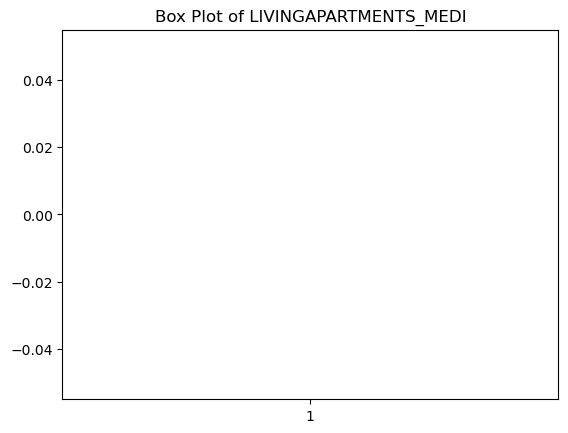

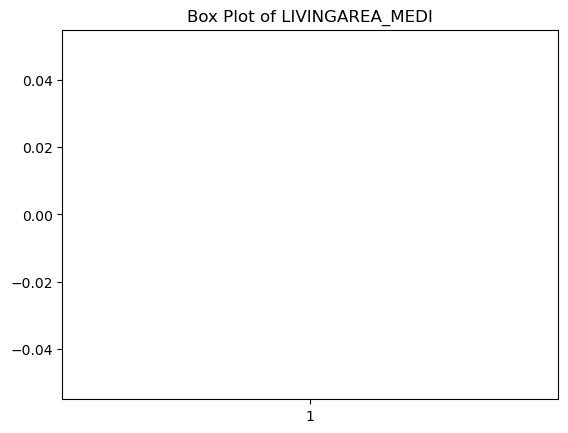

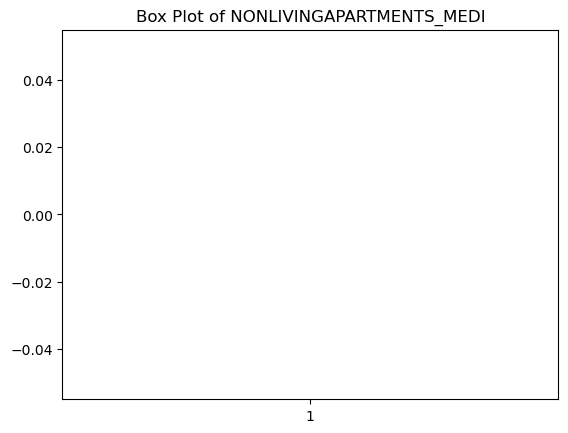

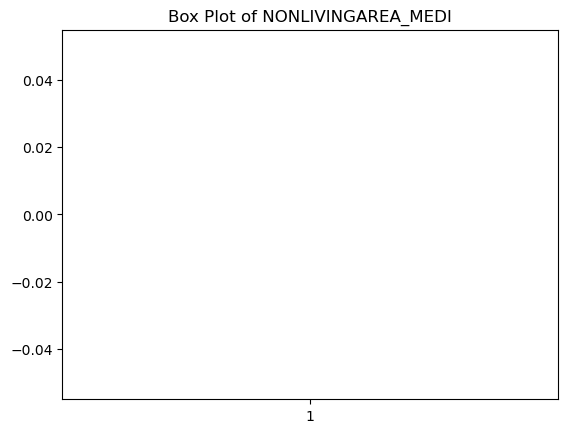

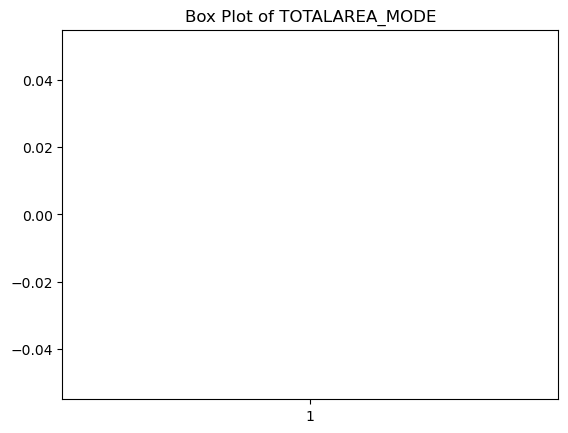

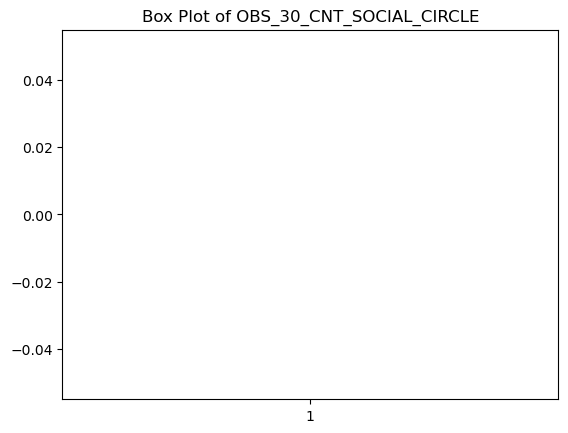

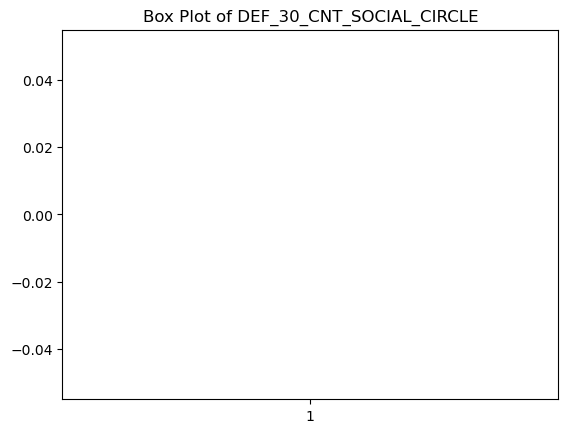

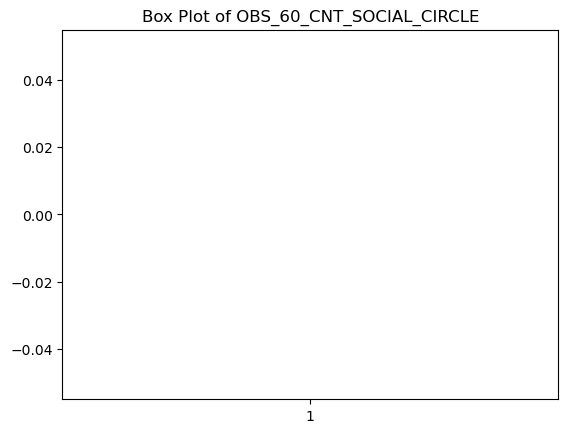

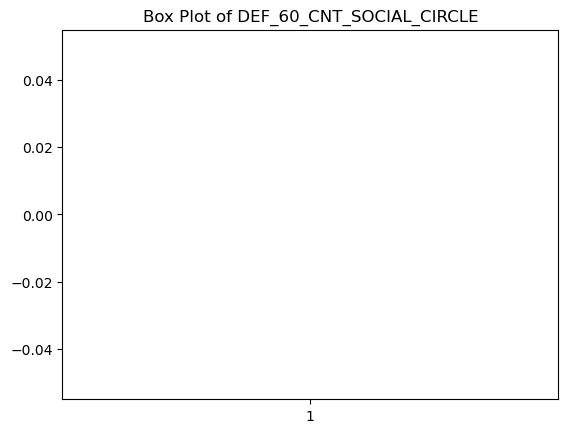

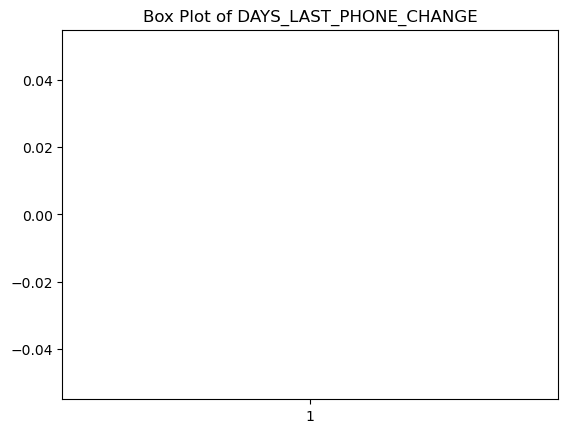

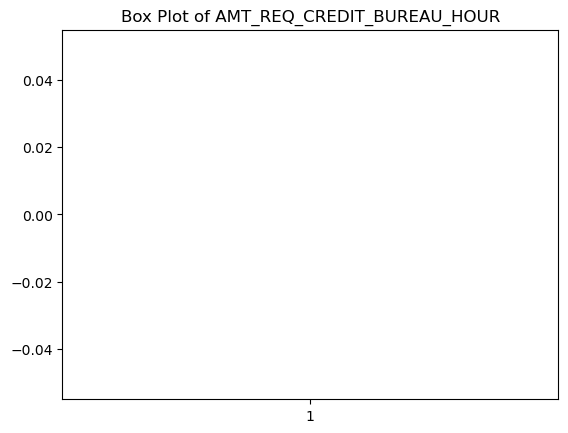

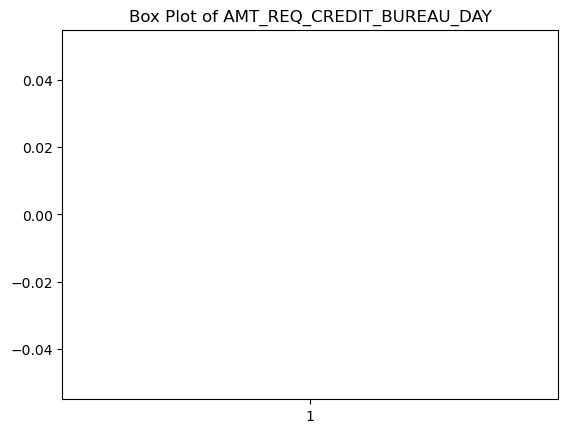

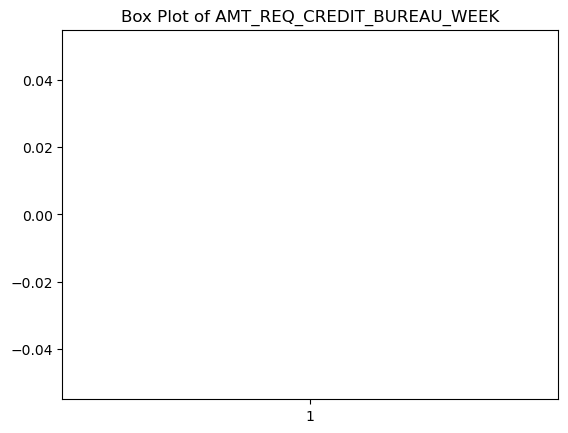

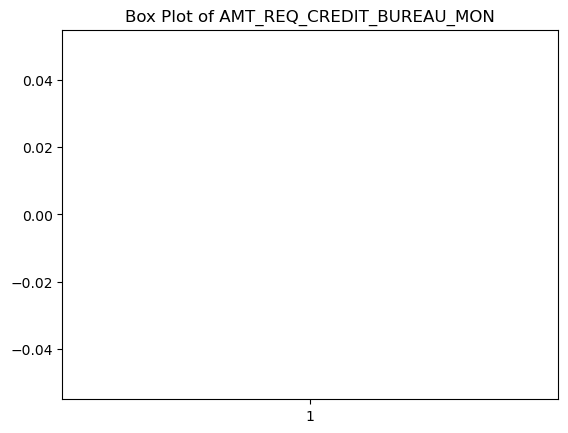

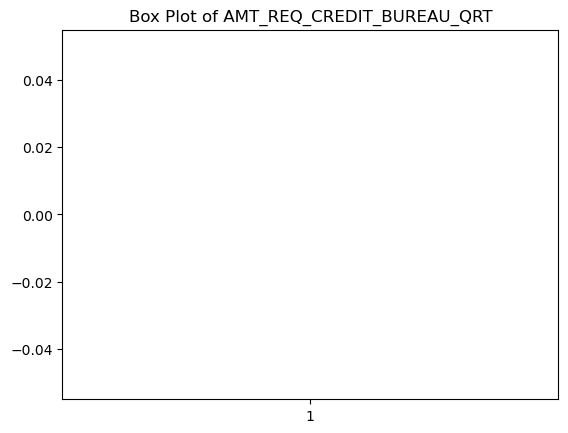

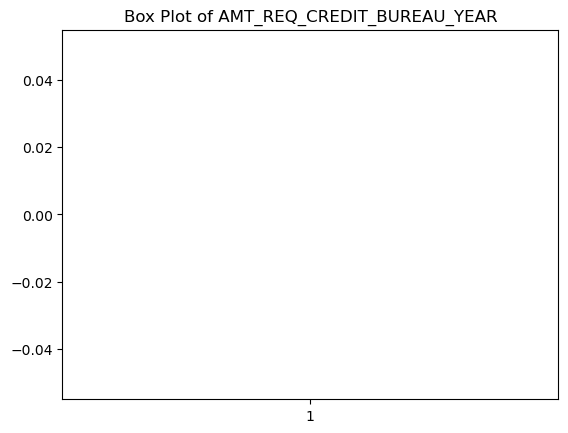

In [20]:
# Select only the numeric columns (continuous data) with more than 2 unique values
continuous_cols = [col for col in numerical_df if df[col].nunique() > 2]

# Loop through each continuous column and create a box plot
for column in continuous_cols:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(f'Box Plot of {column}')
    plt.show()

# Data Cleaning and Manipulation

**Identifying Missing Values in Application Data Frame**

In [21]:
#checking the null value % of each column in appDF
round(df.isnull().sum() /df.shape[0] * 100.00,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                   18.01
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

There are many columns in dataframe where missing values is >= 40%

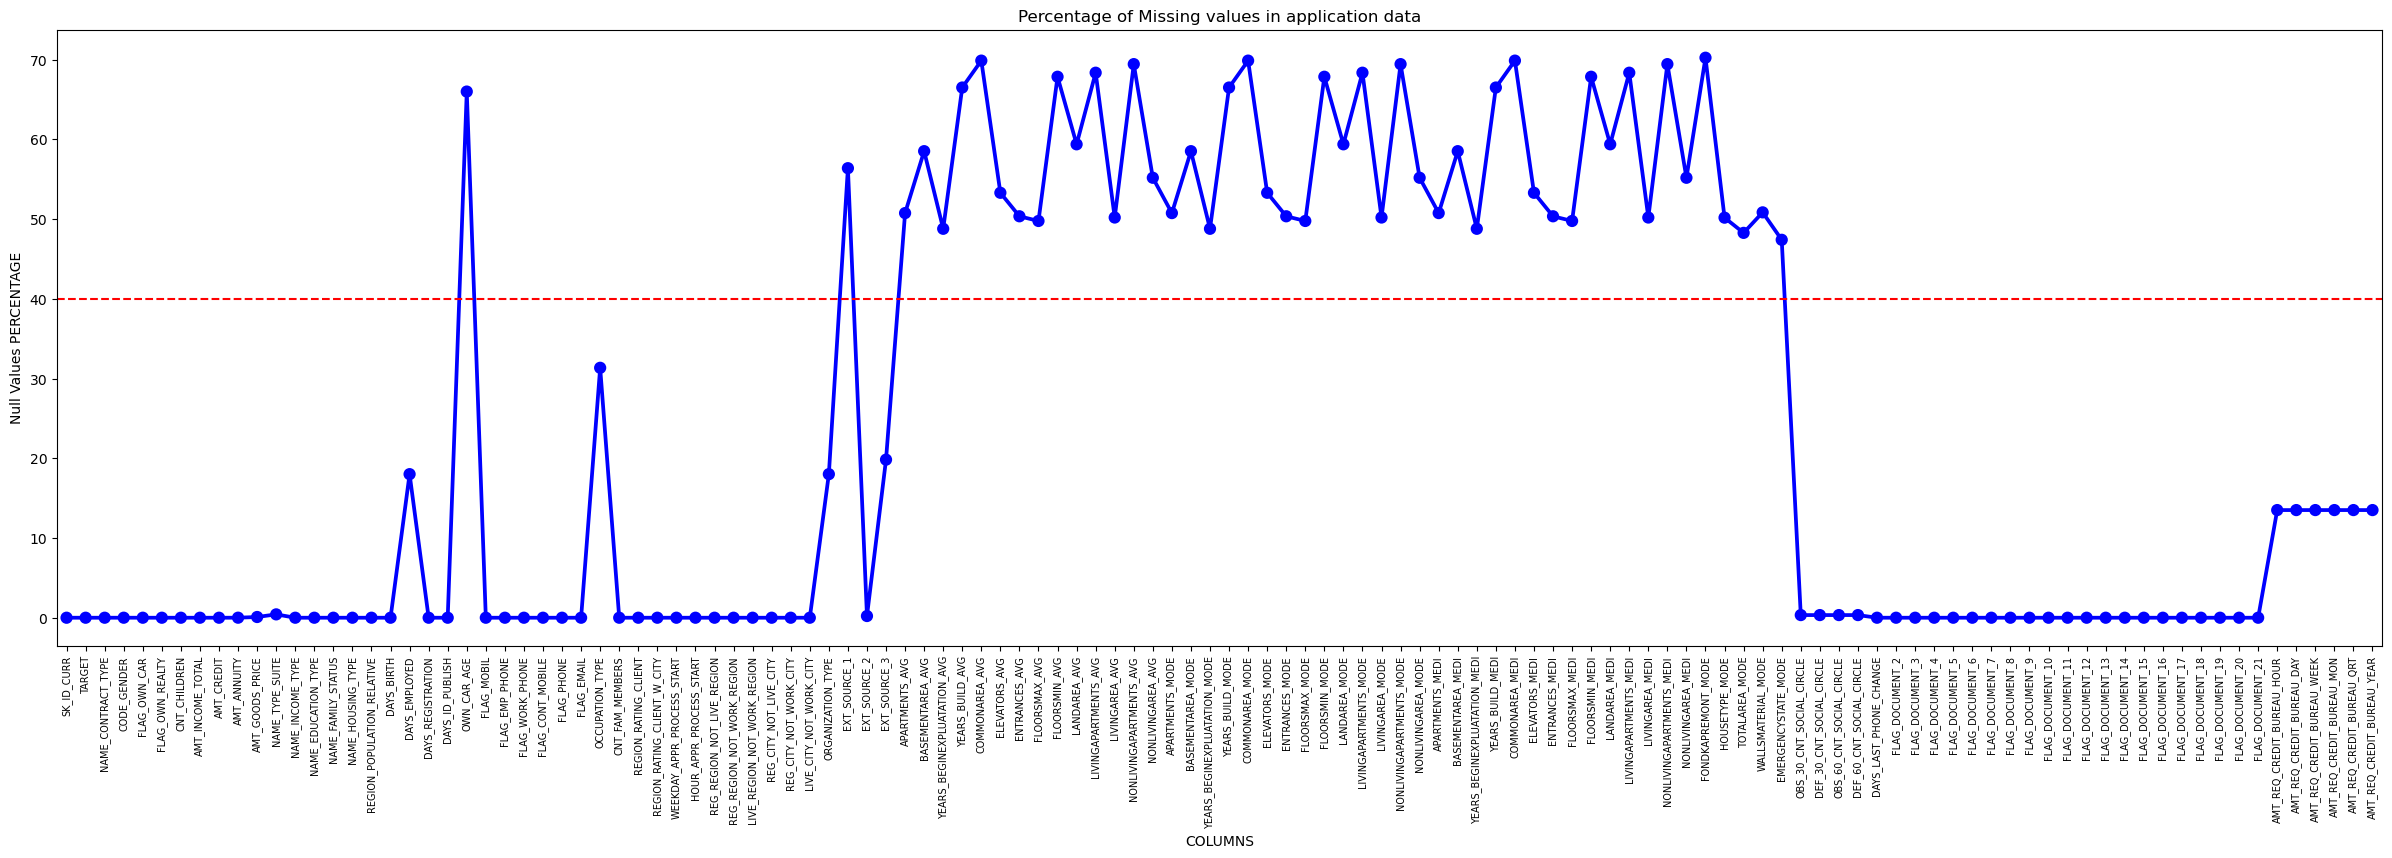

In [22]:
null_DF = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_DF.columns = ['Column Name', 'Null Values Percentage']
fig = plt.figure(figsize=(30,8))
ax = sns.pointplot(x="Column Name",y="Null Values Percentage",data=null_DF,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line

In [23]:
nullcol_40_application = null_DF[null_DF["Null Values Percentage"]>=40]
nullcol_40_application

,Column Name,Null Values Percentage
21,OWN_CAR_AGE,65.990810
41,EXT_SOURCE_1,56.381073
44,APARTMENTS_AVG,50.749729
45,BASEMENTAREA_AVG,58.515956
46,YEARS_BEGINEXPLUATATION_AVG,48.781019
47,YEARS_BUILD_AVG,66.497784
48,COMMONAREA_AVG,69.872297
49,ELEVATORS_AVG,53.295980
50,ENTRANCES_AVG,50.348768
51,FLOORSMAX_AVG,49.760822


In [24]:
# How many columns have more than or euqal to 40% null values ?
len(nullcol_40_application)

49

****Analyze & Delete Unnecessary Columns in applicationDF****(Correlation matrices)

1.EXT_SOURCE_X

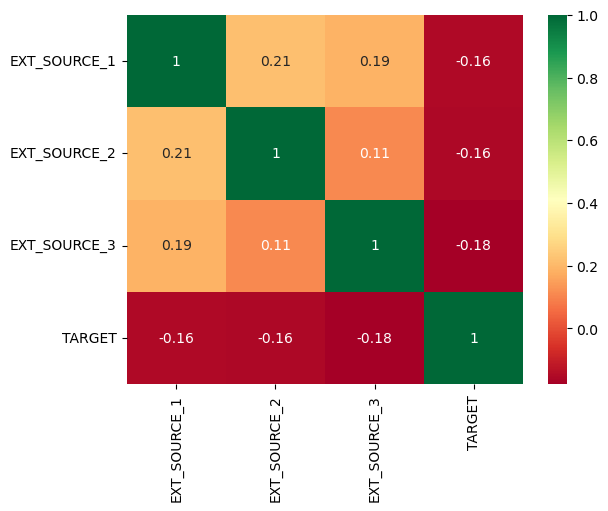

In [25]:
Source = df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
source_corr = Source.corr()
ax = sns.heatmap(source_corr,
            xticklabels=source_corr.columns,
            yticklabels=source_corr.columns,
            annot = True,
            cmap ="RdYlGn")


> Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [26]:
# create a list of columns that needs to be dropped including the columns with >40% null values
Unwanted_application = nullcol_40_application["Column Name"].tolist()+ ['EXT_SOURCE_2','EXT_SOURCE_3'] 
# as EXT_SOURCE_1 column is already included in nullcol_40_application 
len(Unwanted_application)

51

2.Flag Document

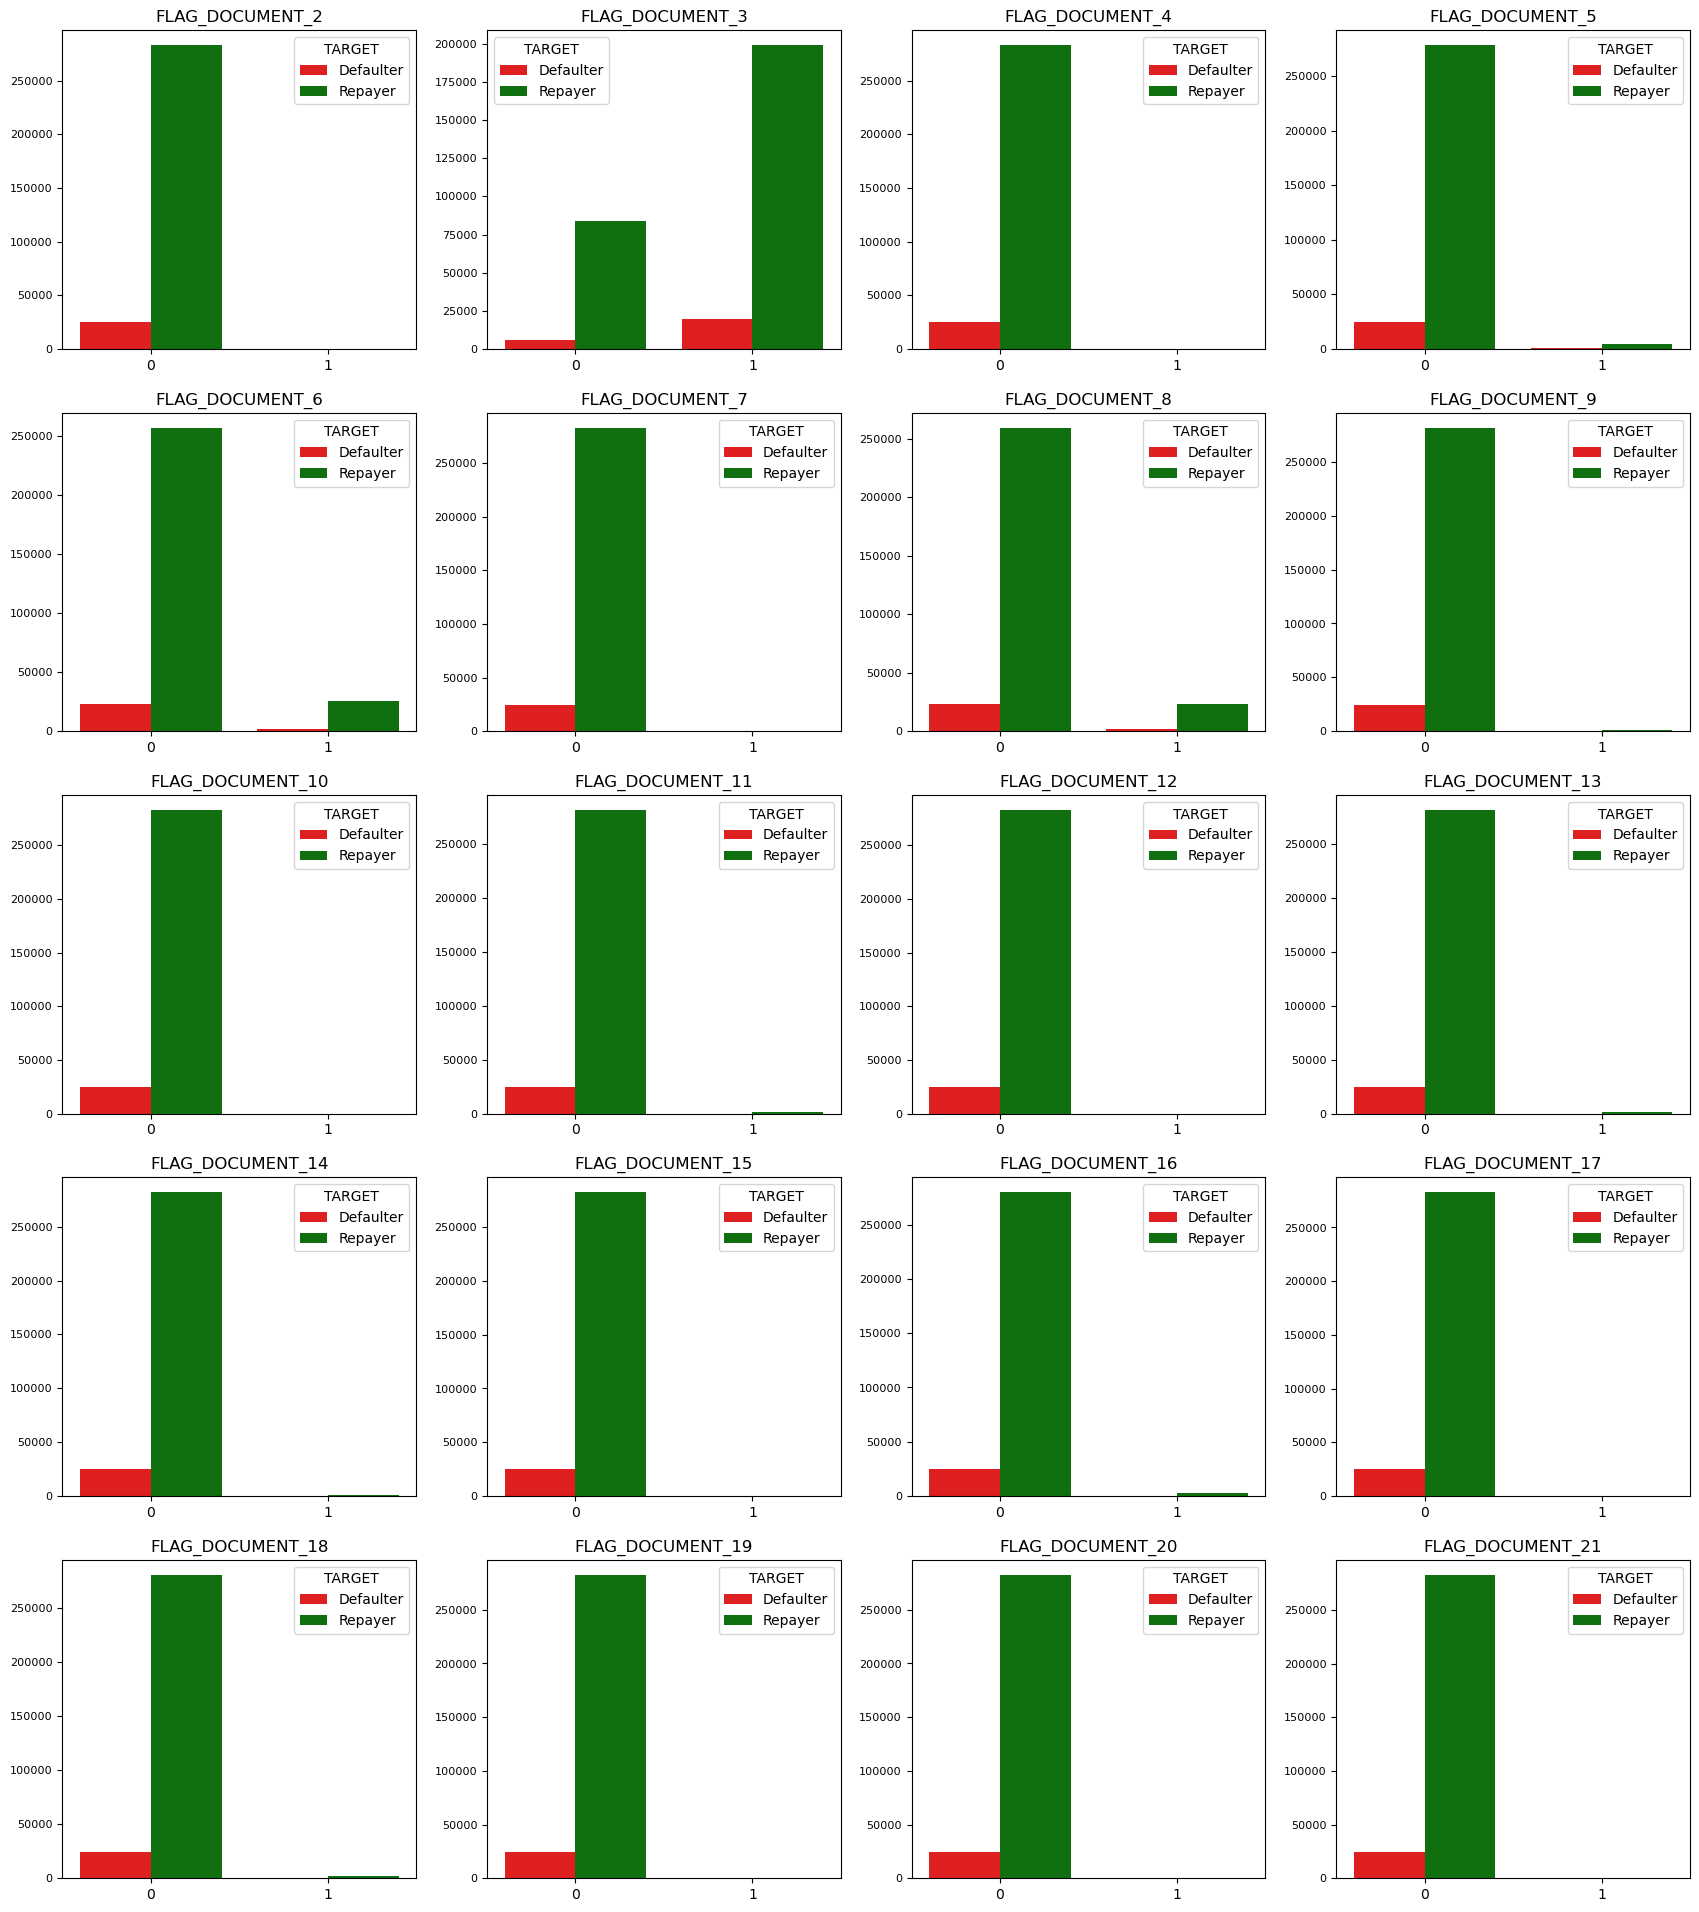

In [27]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_Doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7', 
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
df_flag = df[col_Doc+["TARGET"]]

length = len(col_Doc)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"Defaulter",0:"Repayer"})

fig = plt.figure(figsize=(21,24))

for i,j in itertools.zip_longest(col_Doc,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(data=df_flag,x=i, hue =df_flag["TARGET"],palette=["r","g"])
    plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

> Insight:
The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [28]:
# Including the flag documents for dropping the Document columns
col_Doc.remove('FLAG_DOCUMENT_3') 
Unwanted_application = Unwanted_application + col_Doc
len(Unwanted_application)

70

3.Contact Parameters

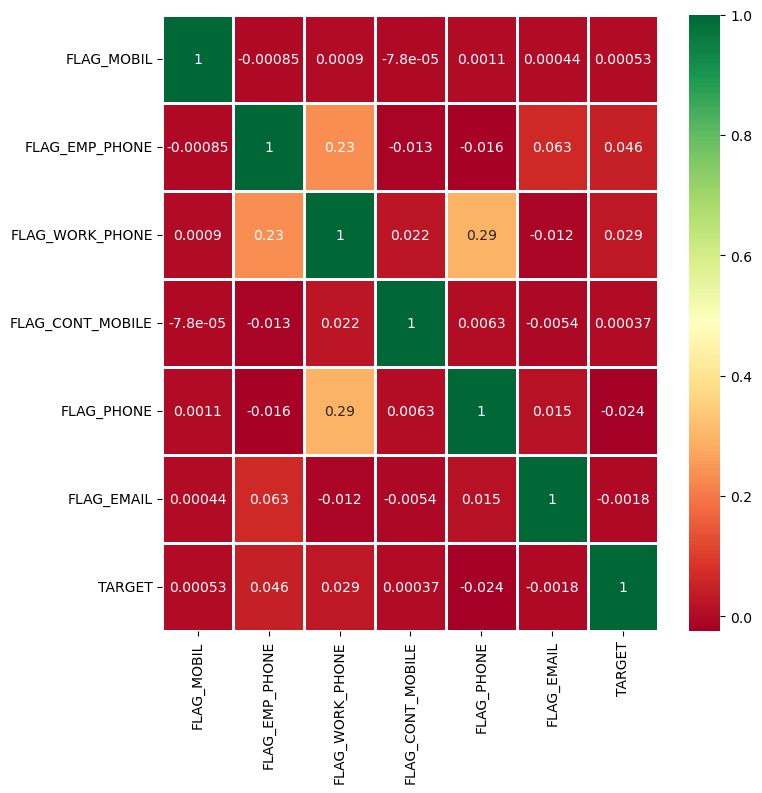

In [29]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
Contact_corr = df[contact_col].corr()
fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(Contact_corr,
            xticklabels=Contact_corr.columns,
            yticklabels=Contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)

> Insight:
There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [30]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET') 
Unwanted_application = Unwanted_application + contact_col
len(Unwanted_application)

76

> Insight:
Total 76 columns can be deleted from applicationDF

In [31]:
# Dropping the unnecessary columns from applicationDF
df.drop(labels=Unwanted_application,axis=1,inplace=True)

In [32]:
# Inspecting the dataframe after removal of unnecessary columns
df.shape

(307511, 46)

In [33]:
# inspecting the column types after removal of unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 46 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307507 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

 **Handline Null Vlues**

> **Numerical Features with outliers**

In [34]:


# List of columns to impute with median
columns_to_impute1 = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','HOUR_APPR_PROCESS_START']

# Impute the specified columns with the median
for column in columns_to_impute1:
    median_value = numerical_df [column].median()
    numerical_df [column].fillna(median_value, inplace=True)


> **Numerical Features with no outliers**

In [35]:


# List of columns to exclude from imputation
columns_to_exclude = columns_to_impute1

# Impute all columns except the ones in 'columns_to_exclude' with the mean
columns_to_impute2 = numerical_df .columns.difference(columns_to_exclude)
numerical_df [columns_to_impute2] = numerical_df [columns_to_impute2].fillna(numerical_df[columns_to_impute2].mean())


> **Categorical Features**

In [36]:

for column in categorical_df:
    mode_value = categorical_df[column].mode().iloc[0]  # Get the first mode value
    categorical_df[column].fillna(mode_value, inplace=True)


# Data Analysis (EDA)

Strategy:
The data analysis flow has been planned in following way :

Imbalance in Data
Categorical Data Analysis
Categorical segmented Univariate Analysis
Categorical Bi/Multivariate analysis
Numeric Data Analysis
Bi-furcation of databased based on TARGET data
Correlation Matrix
Numerical segmented Univariate Analysis
Numerical Bi/Multivariate analysis

**Imbalance Analysis**

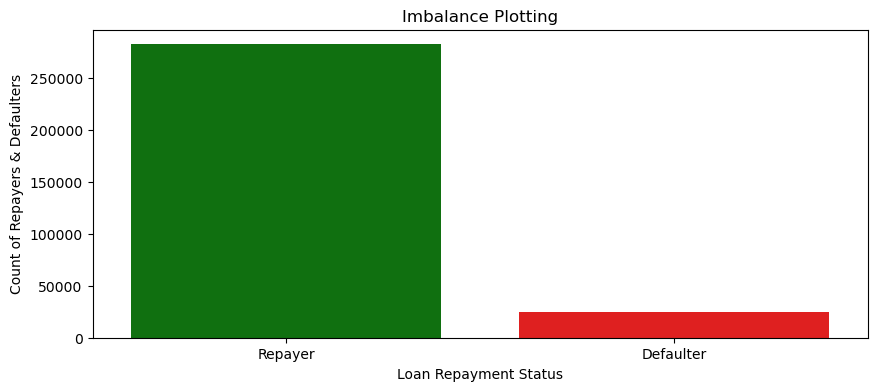

In [37]:
Imbalance = df["TARGET"].value_counts().reset_index() #function is used to count the occurrences of each category in the target variable "TARGET" 

plt.figure(figsize=(10,4))
labels= ['Repayer','Defaulter']
sns.barplot(x=labels,y="TARGET",data = Imbalance,palette= ['g','r'])
plt.xlabel("Loan Repayment Status")
plt.ylabel("Count of Repayers & Defaulters")
plt.title("Imbalance Plotting")
plt.show()

> Overall, the purpose of this code is to visually represent the imbalance in the target variable "TARGET" by creating a bar plot that shows the count of "Repayers" and "Defaulters" in the dataset. The bar plot helps to visualize the class distribution and identify any significant class imbalance, which is essential when dealing with binary classification problems.

In [38]:
count_0 = Imbalance.iloc[0]["TARGET"]
count_1 = Imbalance.iloc[1]["TARGET"]
count_0_perc = round(count_0/(count_0+count_1)*100,2)
count_1_perc = round(count_1/(count_0+count_1)*100,2)

print('Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: %.2f and %.2f'%(count_0_perc,count_1_perc))

Ratios of imbalance in percentage with respect to Repayer and Defaulter datas are: 91.93 and 8.07


the calculation of ratios of imbalance in percentage and relative terms is performed based on the count of occurrences of each category in the target variable "TARGET."

**Plotting Functions**

Following are the common functions customized to perform uniform anaysis that is called for all plots:

> Univariate categorical analysis is a type of data analysis that focuses on examining the distribution and characteristics of a single categorical variable in a dataset. In this analysis, we explore the unique values or categories present in the categorical variable and study their frequencies or proportions. The goal is to understand the distribution of data within each category and gain insights into the relationship between the categorical variable and other variables of interest, such as the target variable in a classification problem.


In [39]:
# function for plotting repetitive countplots in univariate categorical analysis on applicationDF
# This function will create two subplots: 
# 1. Count plot of categorical column w.r.t TARGET; 
# 2. Percentage of defaulters within column

def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,24))
        
    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1, 
                    x = feature, 
                    data=df,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])
    
    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'}) 
    ax1.legend(['Repayer','Defaulter'])
    
    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})   
    
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2, 
                    x = feature, 
                    y='TARGET', 
                    order=cat_perc[feature], 
                    data=cat_perc,
                    palette='Set2')
    
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 

    plt.show();

> The provided code defines a function called bivariate_bar that is used to create bar plots for bivariate categorical analysis. The function allows you to compare the relationship between two categorical variables (x and y) and the target variable (hue) using a bar plot.

In [40]:
# function for plotting repetitive countplots in bivariate categorical analysis

def bivariate_bar(x,y,df,hue,figsize):
    
    plt.figure(figsize=figsize)
    sns.barplot(x=x,
                  y=y,
                  data=df, 
                  hue=hue, 
                  palette =['g','r'])     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.ylabel(y,fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})    
    plt.title(col, fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.xticks(rotation=90, ha='right')
    plt.legend(labels = ['Repayer','Defaulter'])
    plt.show()

> 
The provided code defines a function called bivariate_rel that is used to create scatter plots (relation plots) for bivariate numerical analysis on the DataFrame. The function allows you to compare the relationship between two numerical variables (x and y) and the target variable (hue) using a scatter plot.

In [41]:
# function for plotting repetitive rel plots in bivaritae numerical analysis on applicationDF

def bivariate_rel(x,y,data, hue, kind, palette, legend,figsize):
    
    plt.figure(figsize=figsize)
    sns.relplot(x=x, 
                y=y, 
                data=df, 
                hue="TARGET",
                kind=kind,
                palette = ['g','r'],
                legend = False)
    plt.legend(['Repayer','Defaulter'])
    plt.xticks(rotation=90, ha='right')
    plt.show()

> The provided code defines a function called univariate_merged that is used to create count plots for univariate categorical analysis on a merged DataFrame (df). The function allows you to visualize the distribution of a categorical column (col) while considering the impact of another categorical variable (hue) using a count plot.

In [42]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_merged(col,df,hue,palette,ylog,figsize):
    plt.figure(figsize=figsize)
    ax=sns.countplot(x=col, 
                  data=df,
                  hue= hue,
                  palette= palette,
                  order=df[col].value_counts().index)
    

    if ylog:
        plt.yscale('log')
        plt.ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})     
    else:
        plt.ylabel("Count",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})       

    plt.title(col , fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    plt.legend(loc = "upper right")
    plt.xticks(rotation=90, ha='right')
    
    plt.show()

In [43]:
# Function to plot point plots on merged dataframe

def merged_pointplot(x,y):
    plt.figure(figsize=(8,4))
    sns.pointplot(x=x, 
                  y=y, 
                  hue="TARGET", 
                  data=loan_process_df,
                  palette =['g','r'])
   # plt.legend(['Repayer','Defaulter'])

**Categorical Variables Analysis**

> *Segmented Univariate Analysis*

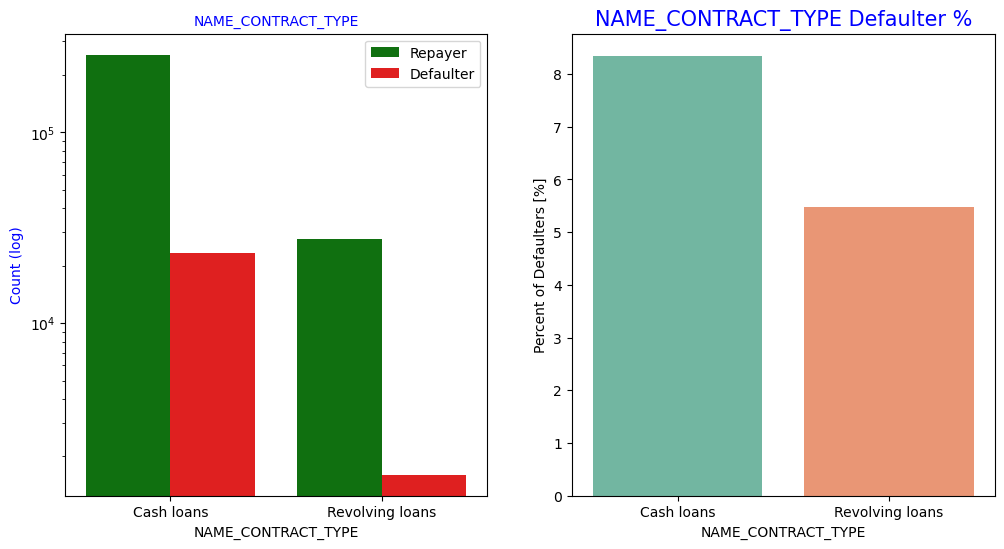

In [44]:
# Checking the contract type based on loan repayment status
univariate_categorical('NAME_CONTRACT_TYPE',True)

> Inferences:
Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

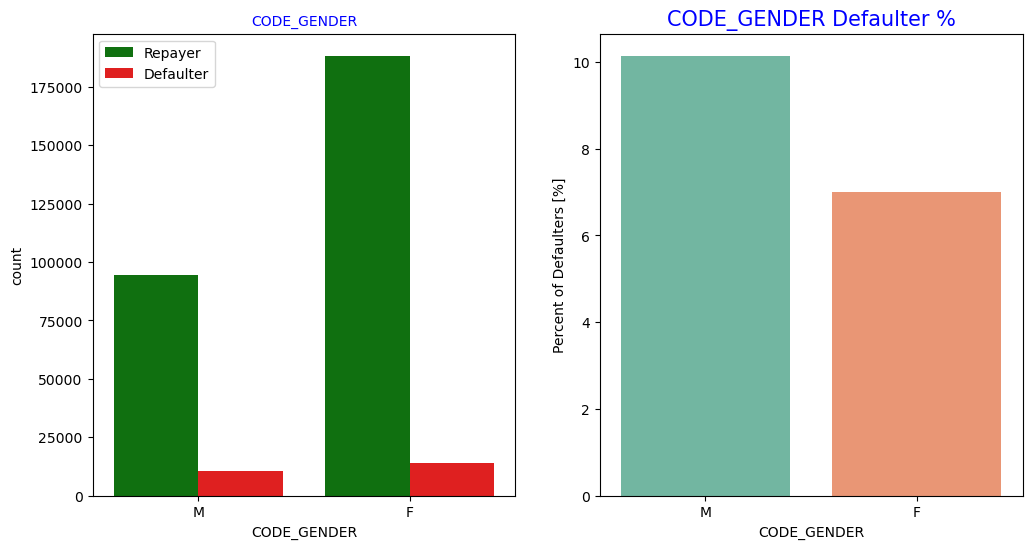

In [45]:
# Checking the type of Gender on loan repayment status
univariate_categorical('CODE_GENDER')

> The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%)

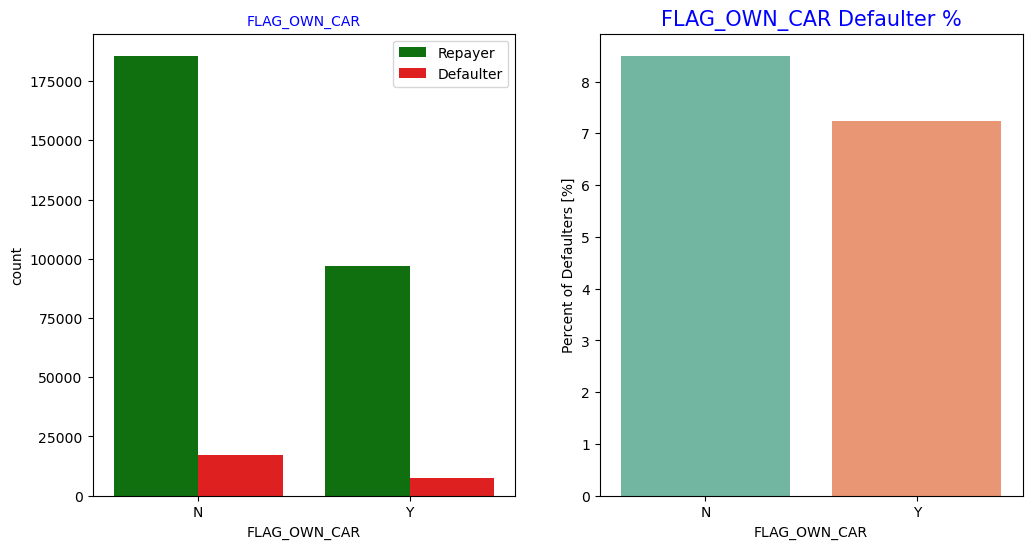

In [46]:
# Checking if owning a car is related to loan repayment status
univariate_categorical('FLAG_OWN_CAR')

> Inferences:
Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

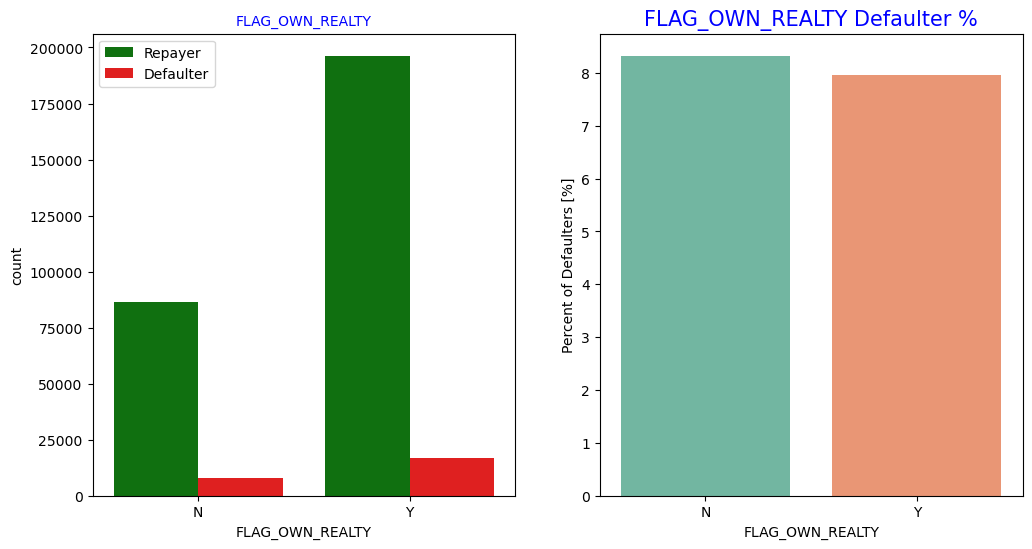

In [47]:
# Checking if owning a realty is related to loan repayment status
univariate_categorical('FLAG_OWN_REALTY')

> Inferences:
The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan.

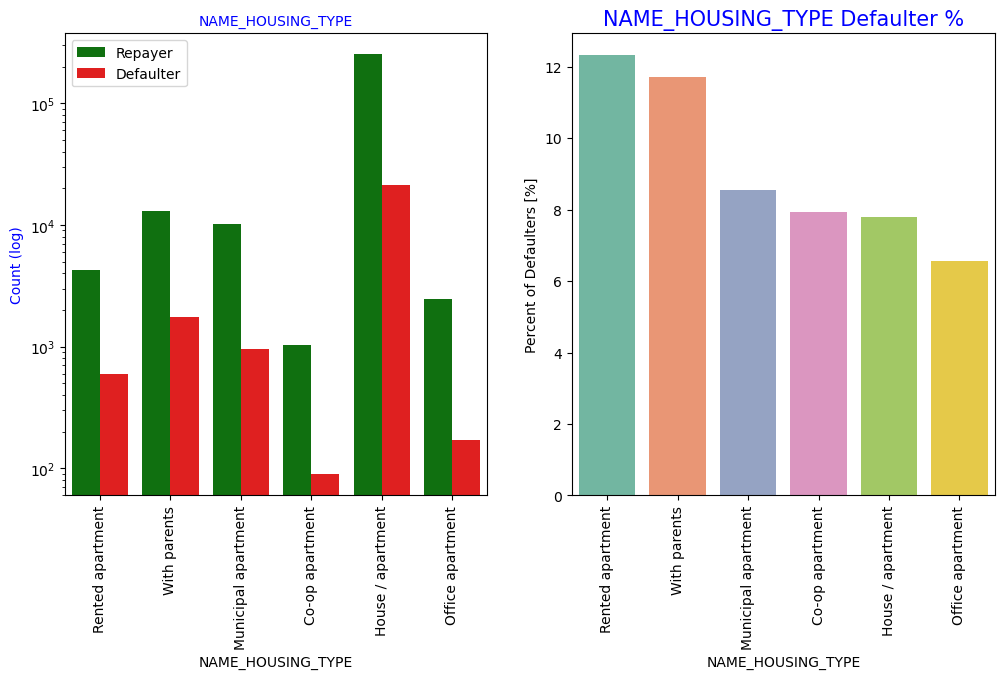

In [48]:
# Analyzing Housing Type based on loan repayment status
univariate_categorical("NAME_HOUSING_TYPE",True,True,True)

> Inferences:
1. Majority of people live in House/apartment
2. People living in office apartments have lowest default rate
3. People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

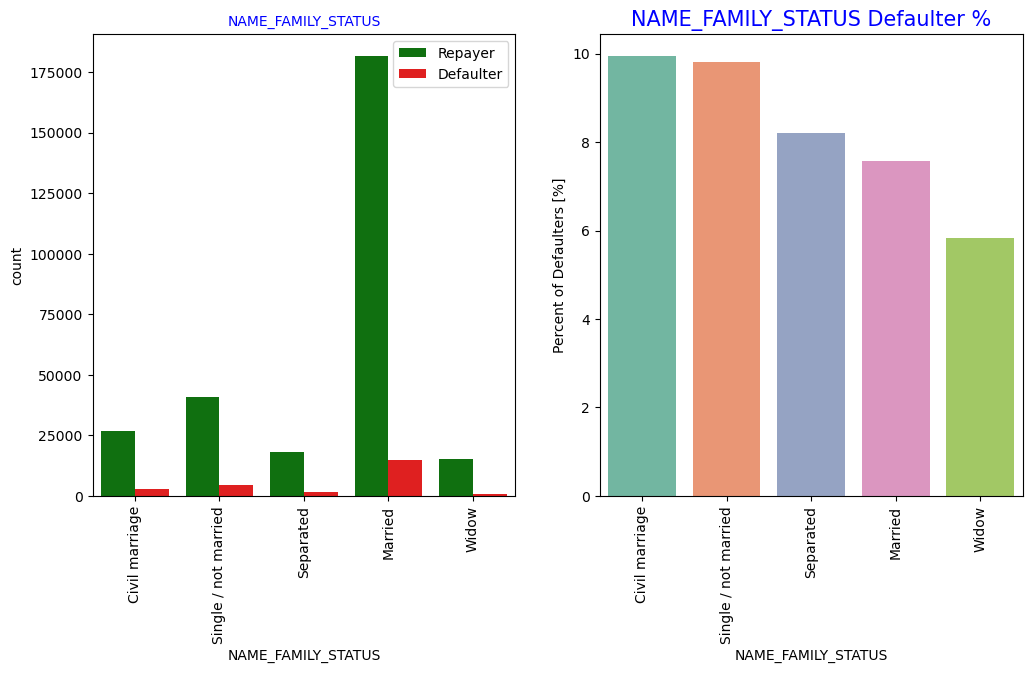

In [49]:
# Analyzing Family status based on loan repayment status
univariate_categorical("NAME_FAMILY_STATUS",False,True,True)

> Inferences:
1. Most of the people who have taken loan are married, followed by Single/not married and civil marriage
2. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

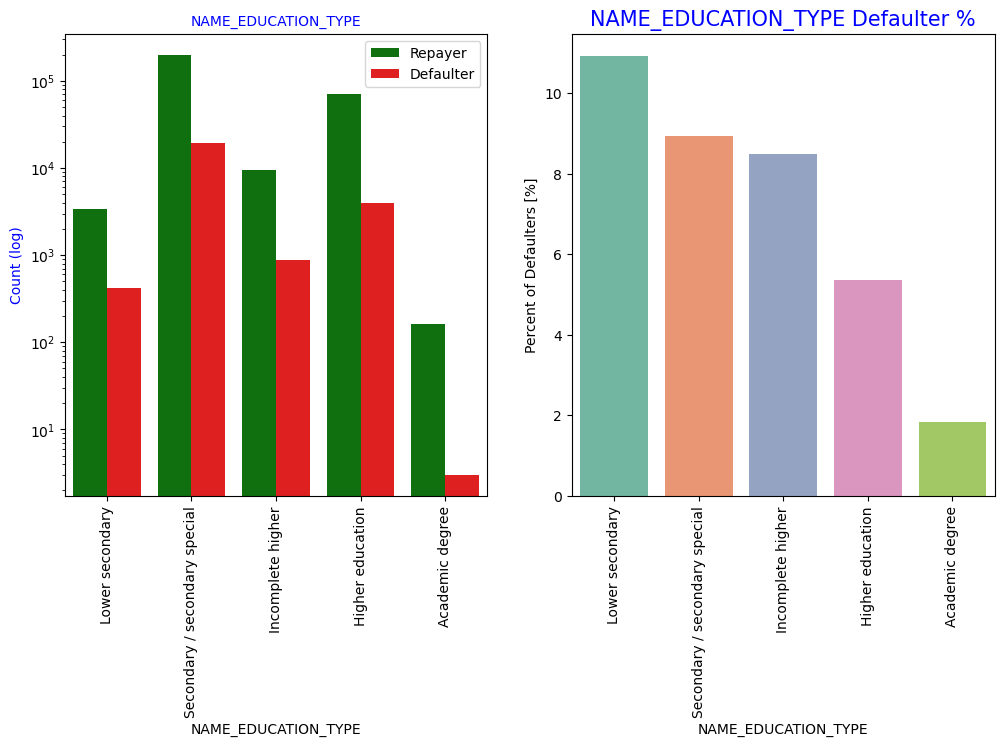

In [50]:
# Analyzing Education Type based on loan repayment status
univariate_categorical("NAME_EDUCATION_TYPE",True,True,True)

> Inferences:
1. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree
2. The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

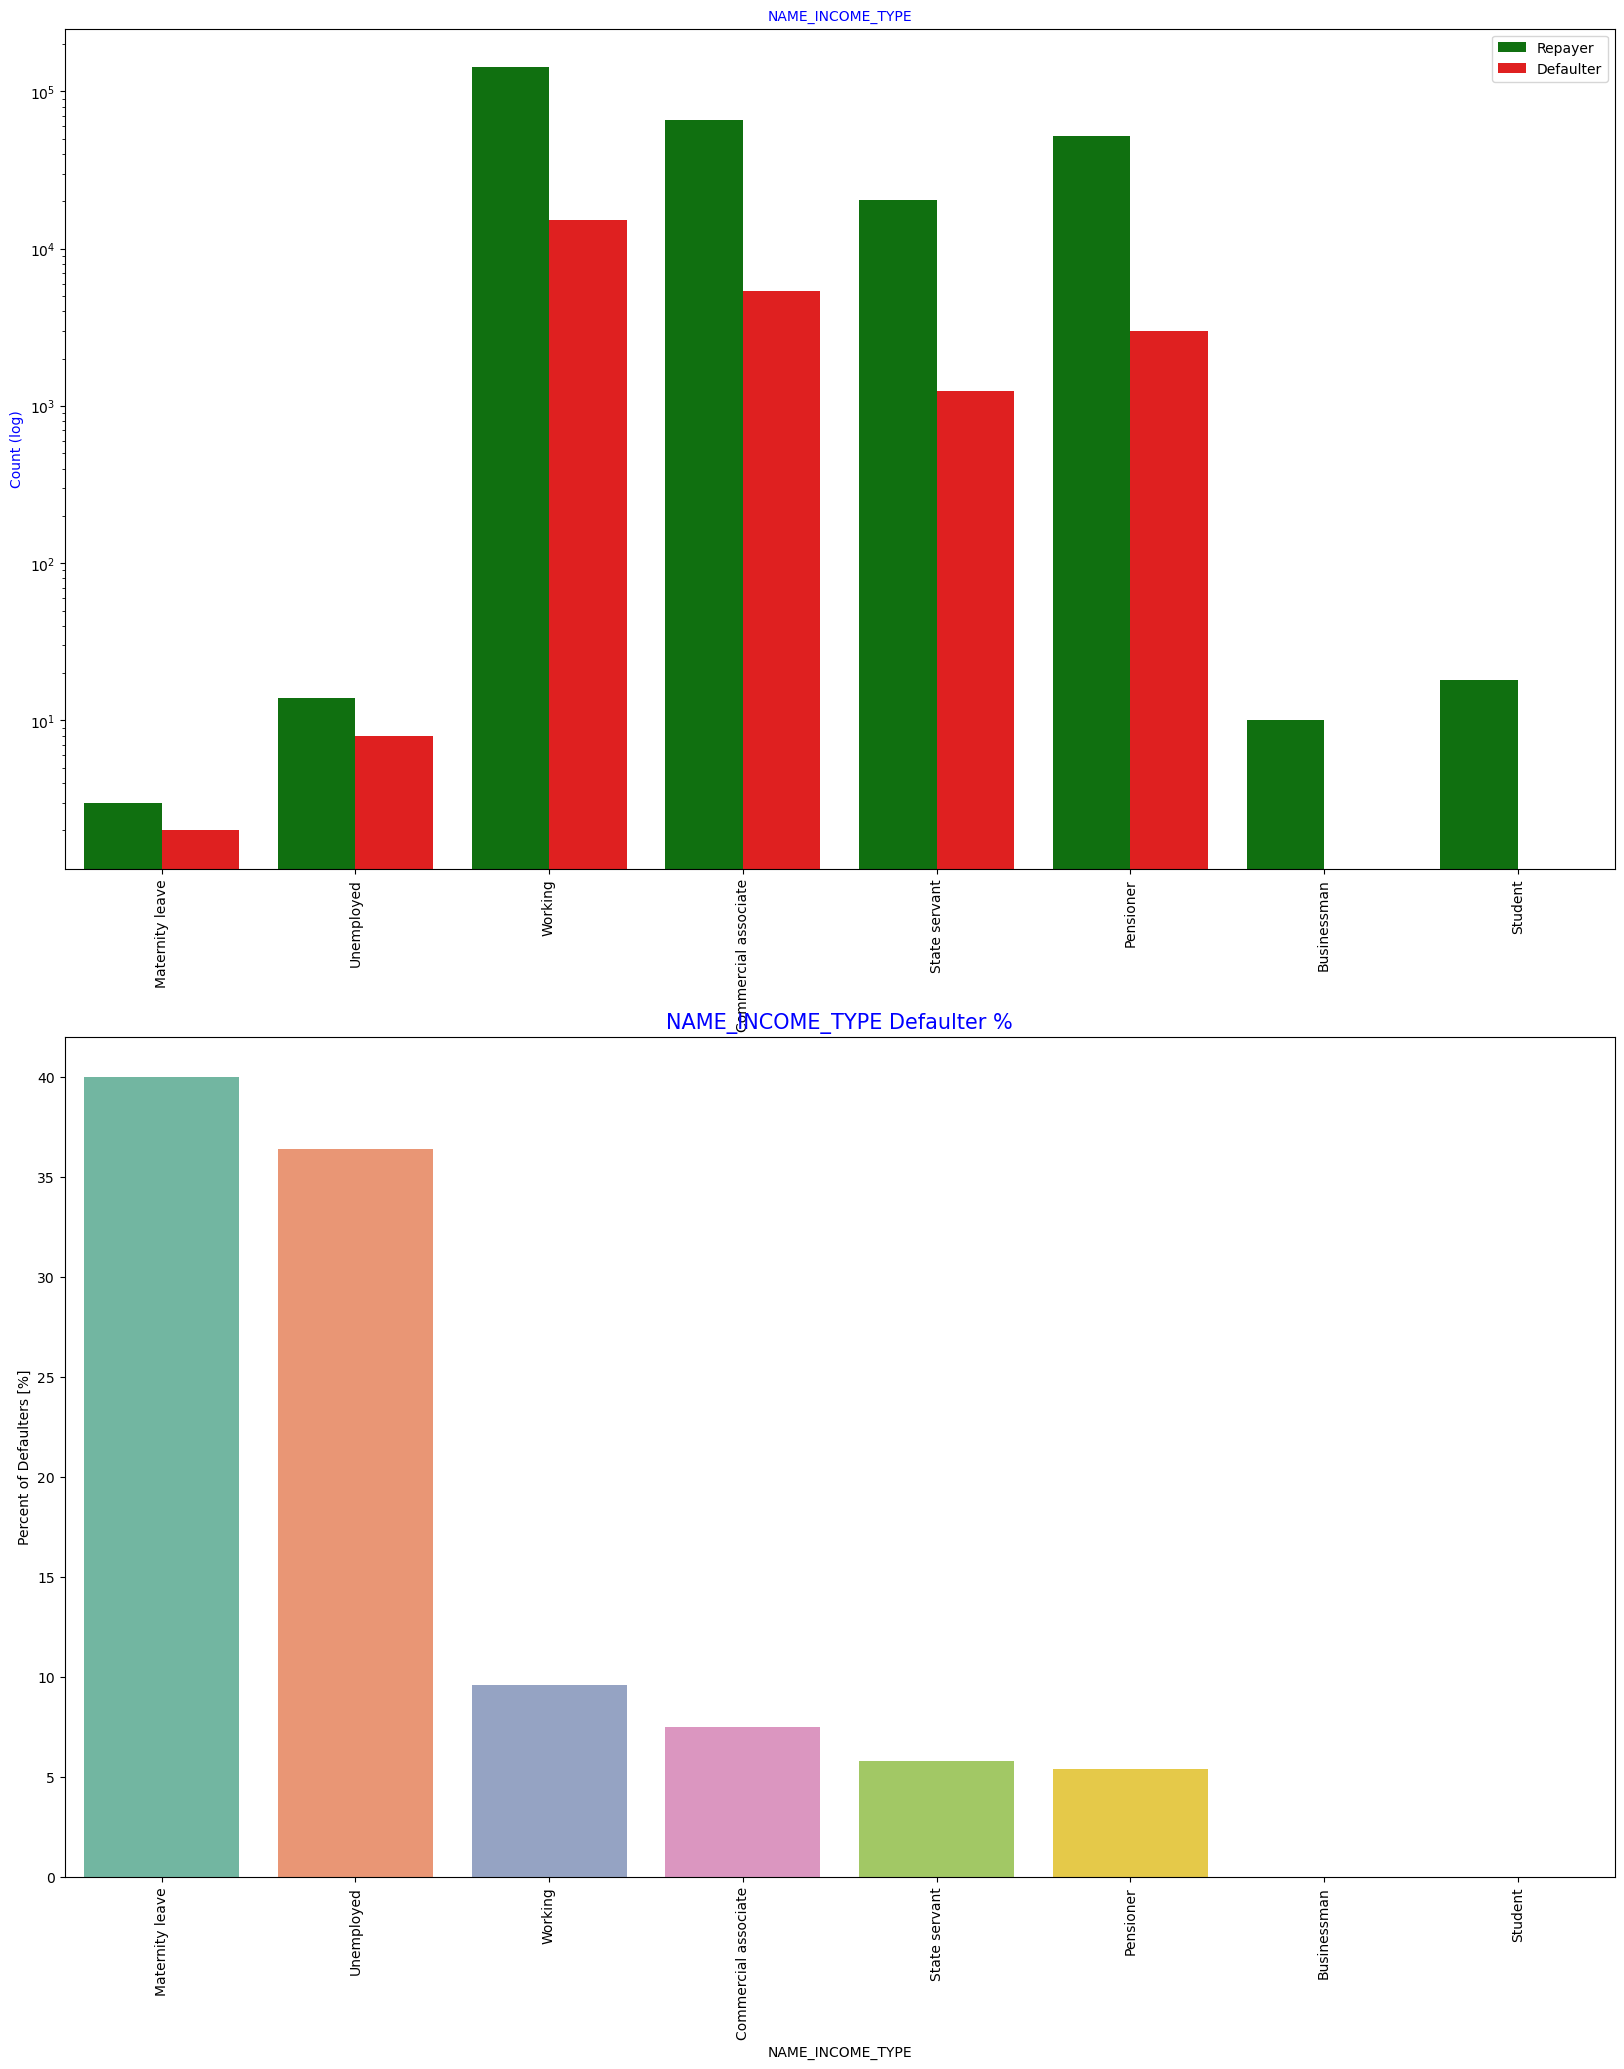

In [51]:
# Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

> Inferences:
1. Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.
2. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
3. Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

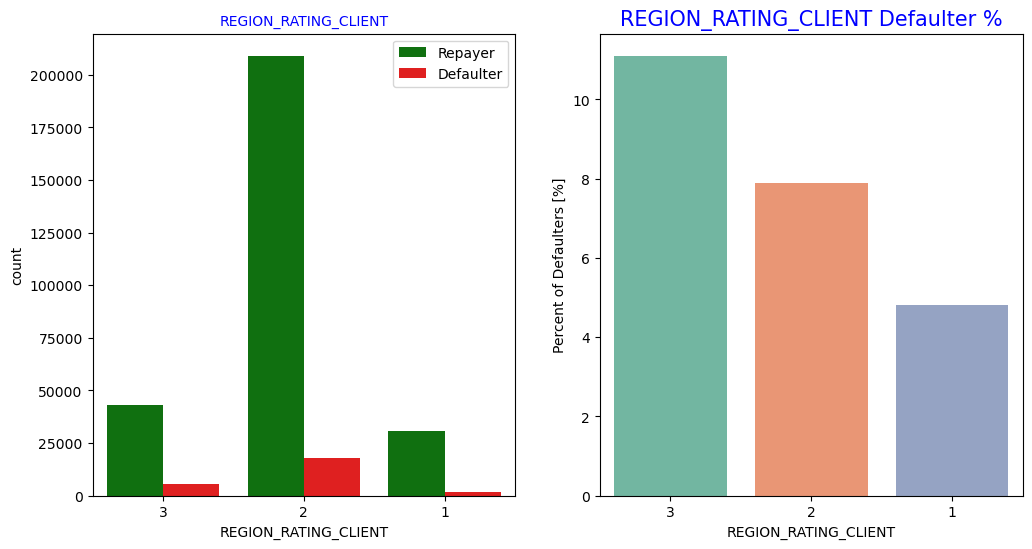

In [52]:
# Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

> Inferences:
1. Most of the applicants are living in Region_Rating 2 place.
2. Region Rating 3 has the highest default rate (11%)
3. Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

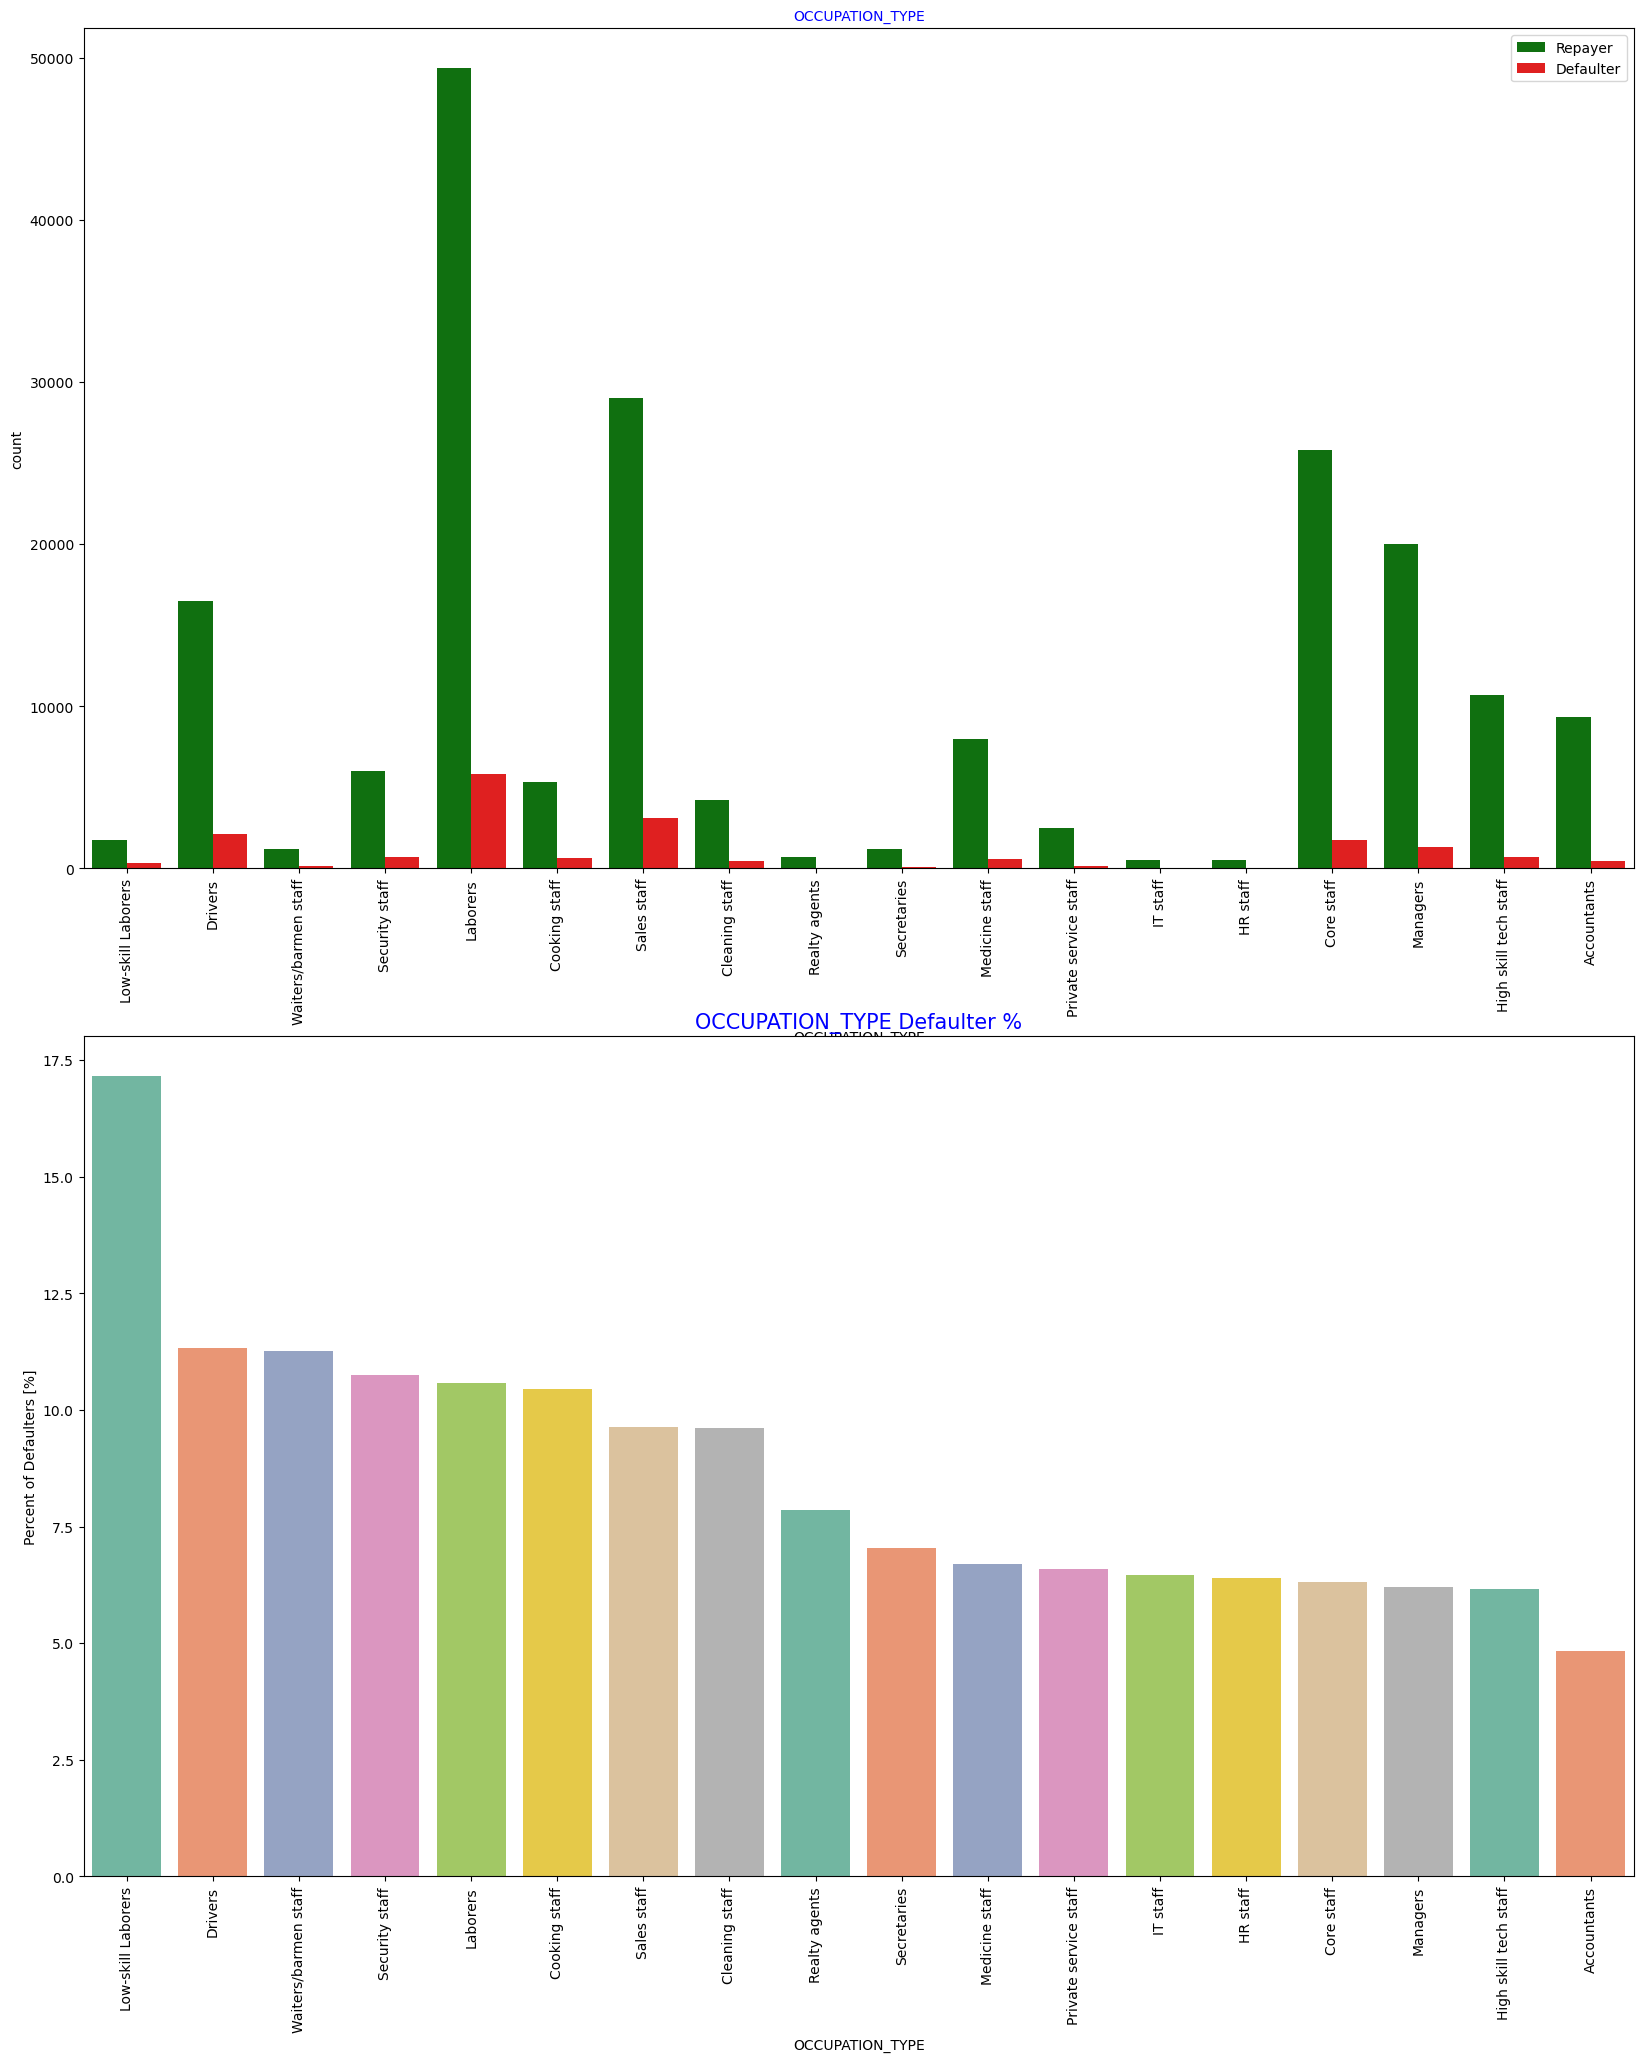

In [53]:
# Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

> Inferences:
1. Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
2. The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

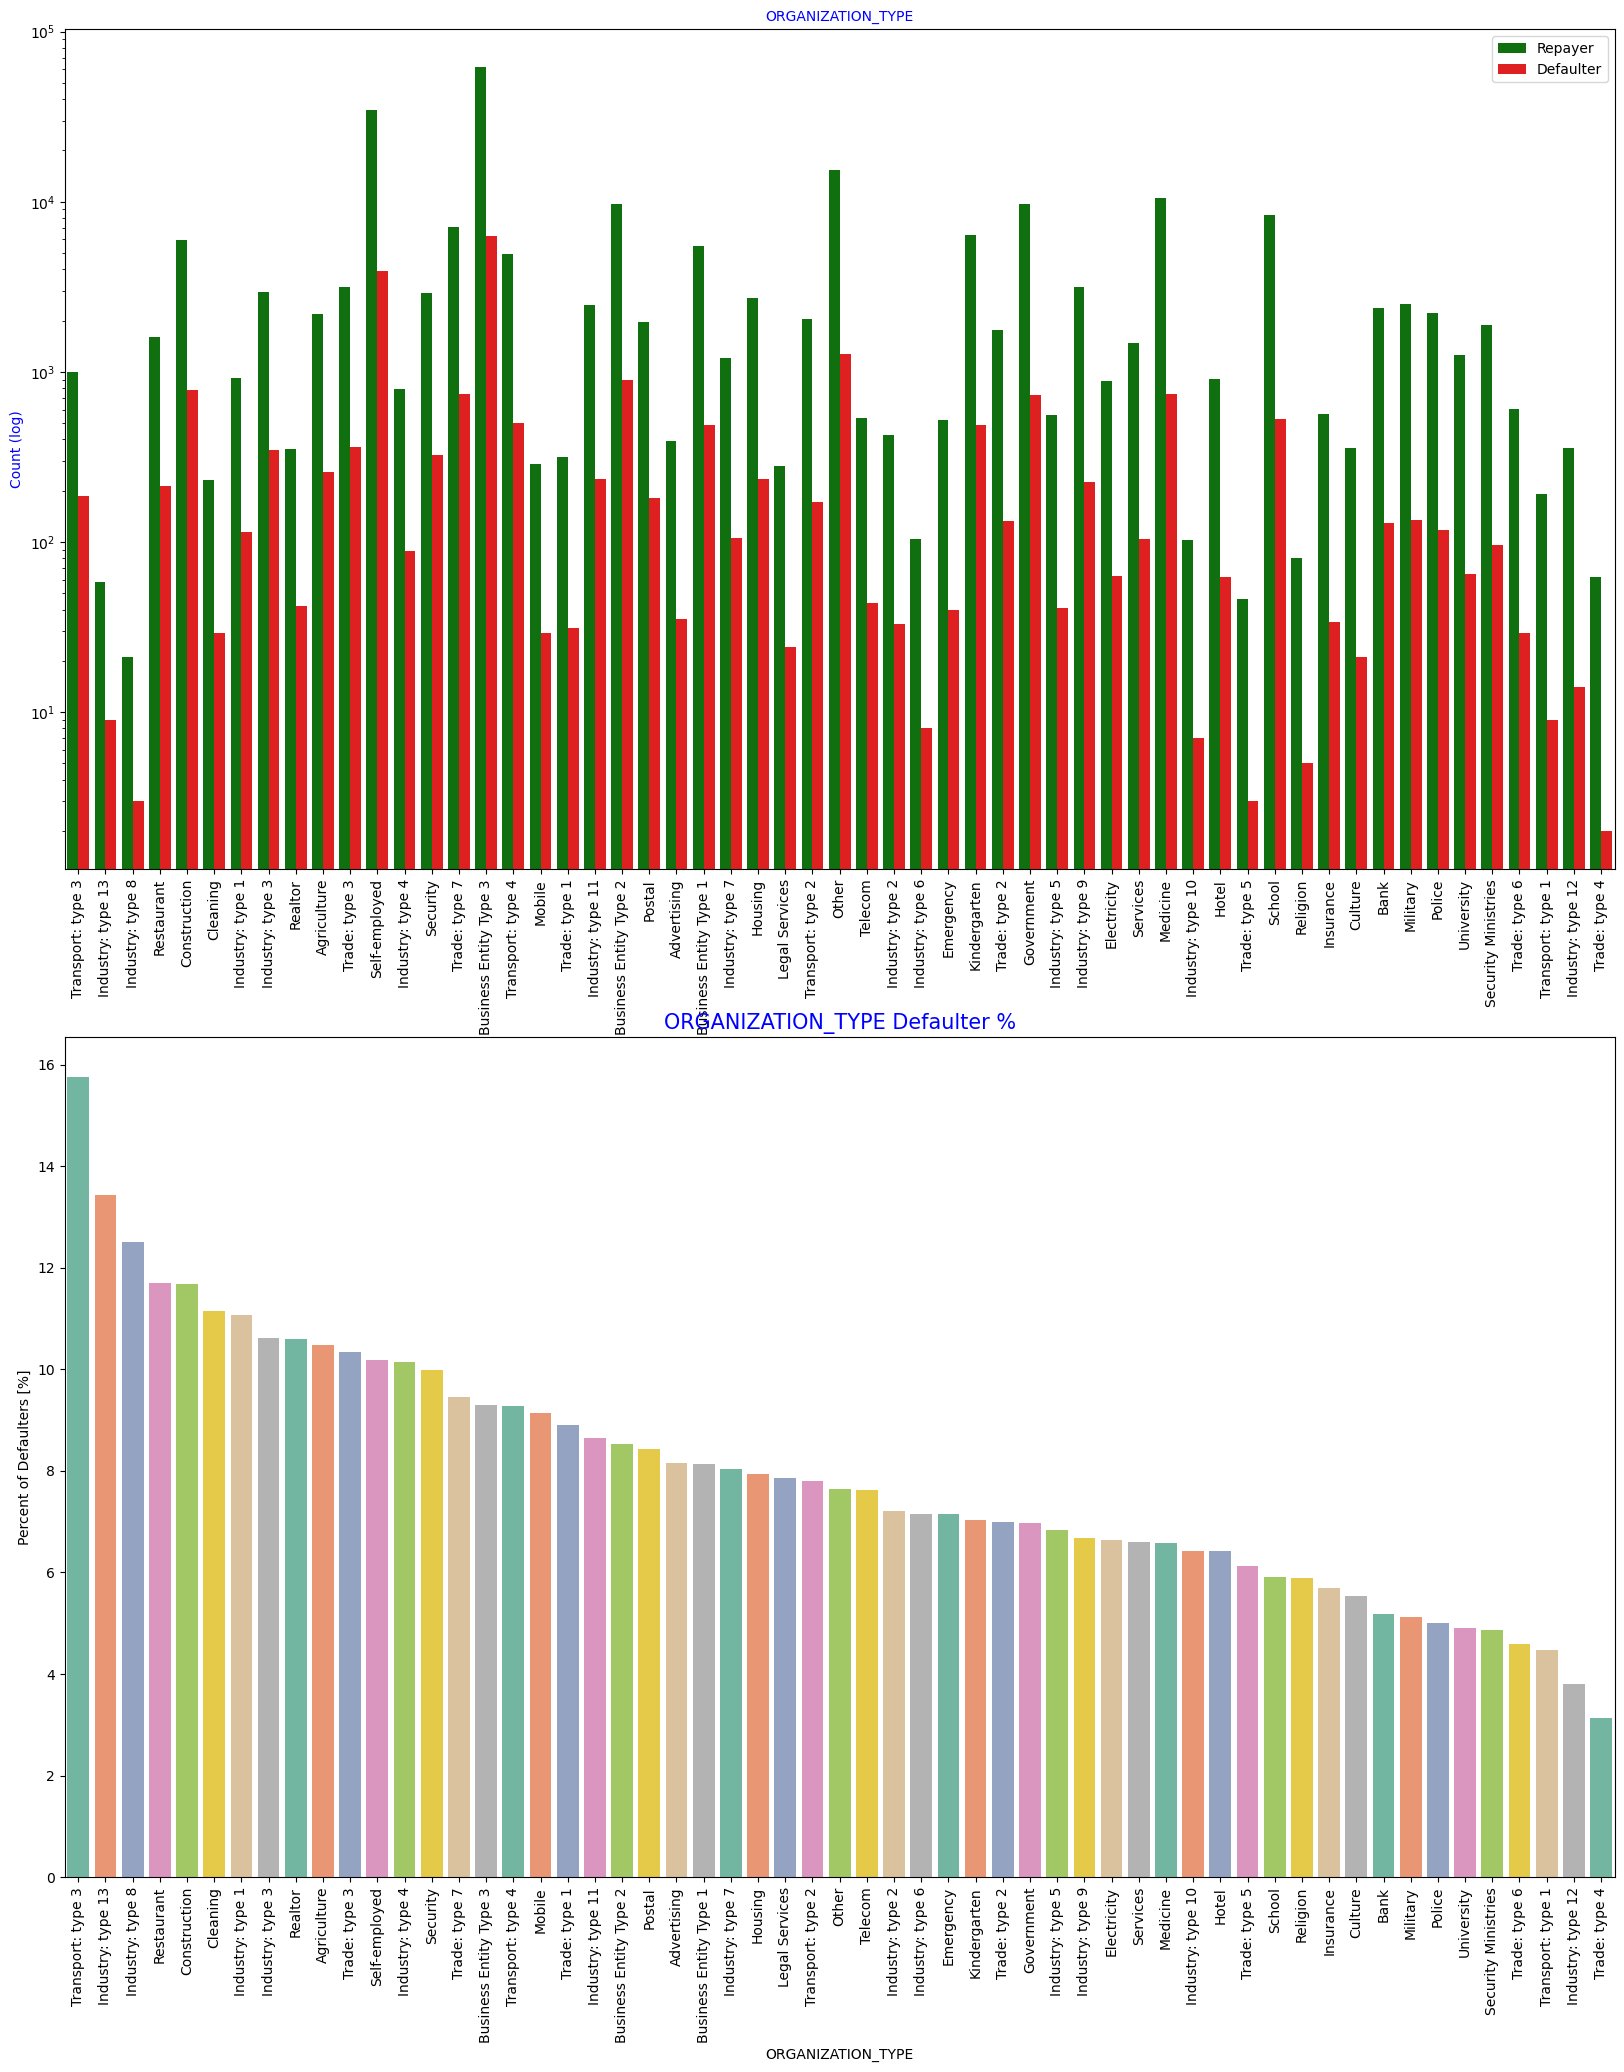

In [54]:
# Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

> Inferences:
1. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.
2. Most of the people application for loan are from Business Entity Type 3
3. For a very high number of applications, Organization type information is unavailable(XNA)

It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:

1. Trade Type 4 and 5
2. Industry type 8

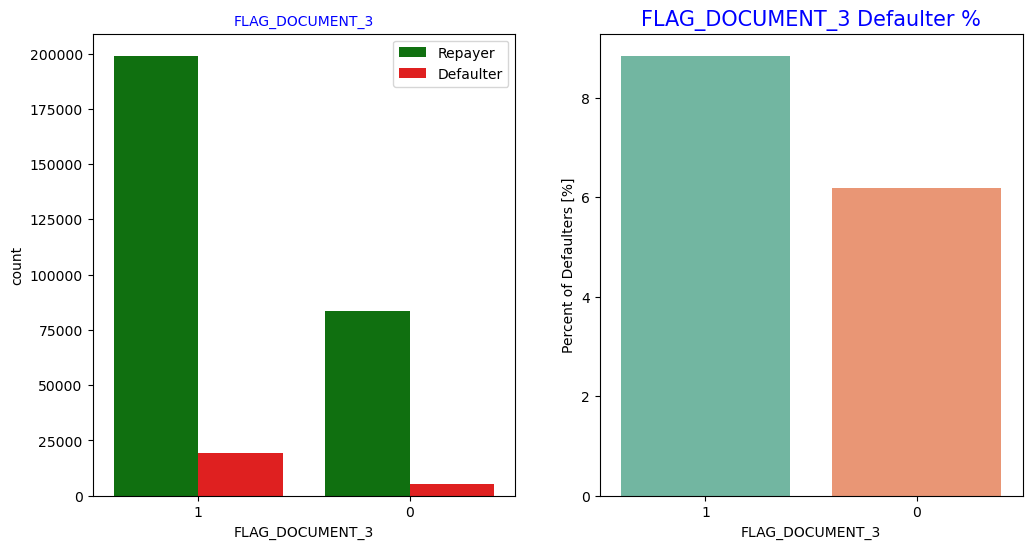

In [55]:
# Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

> Inferences:
There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

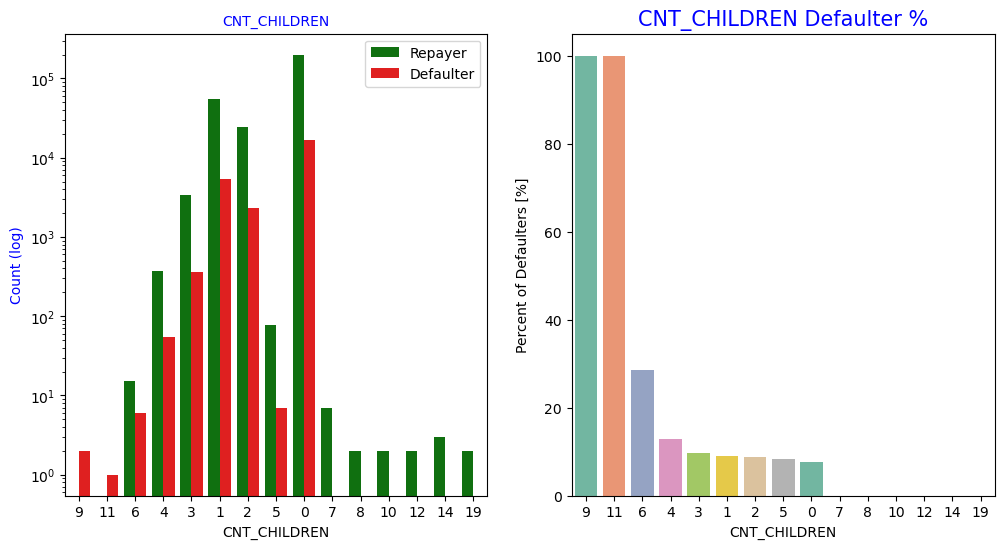

In [56]:
# Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

> Inferences:
Most of the applicants do not have children
Very few clients have more than 3 children.
Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

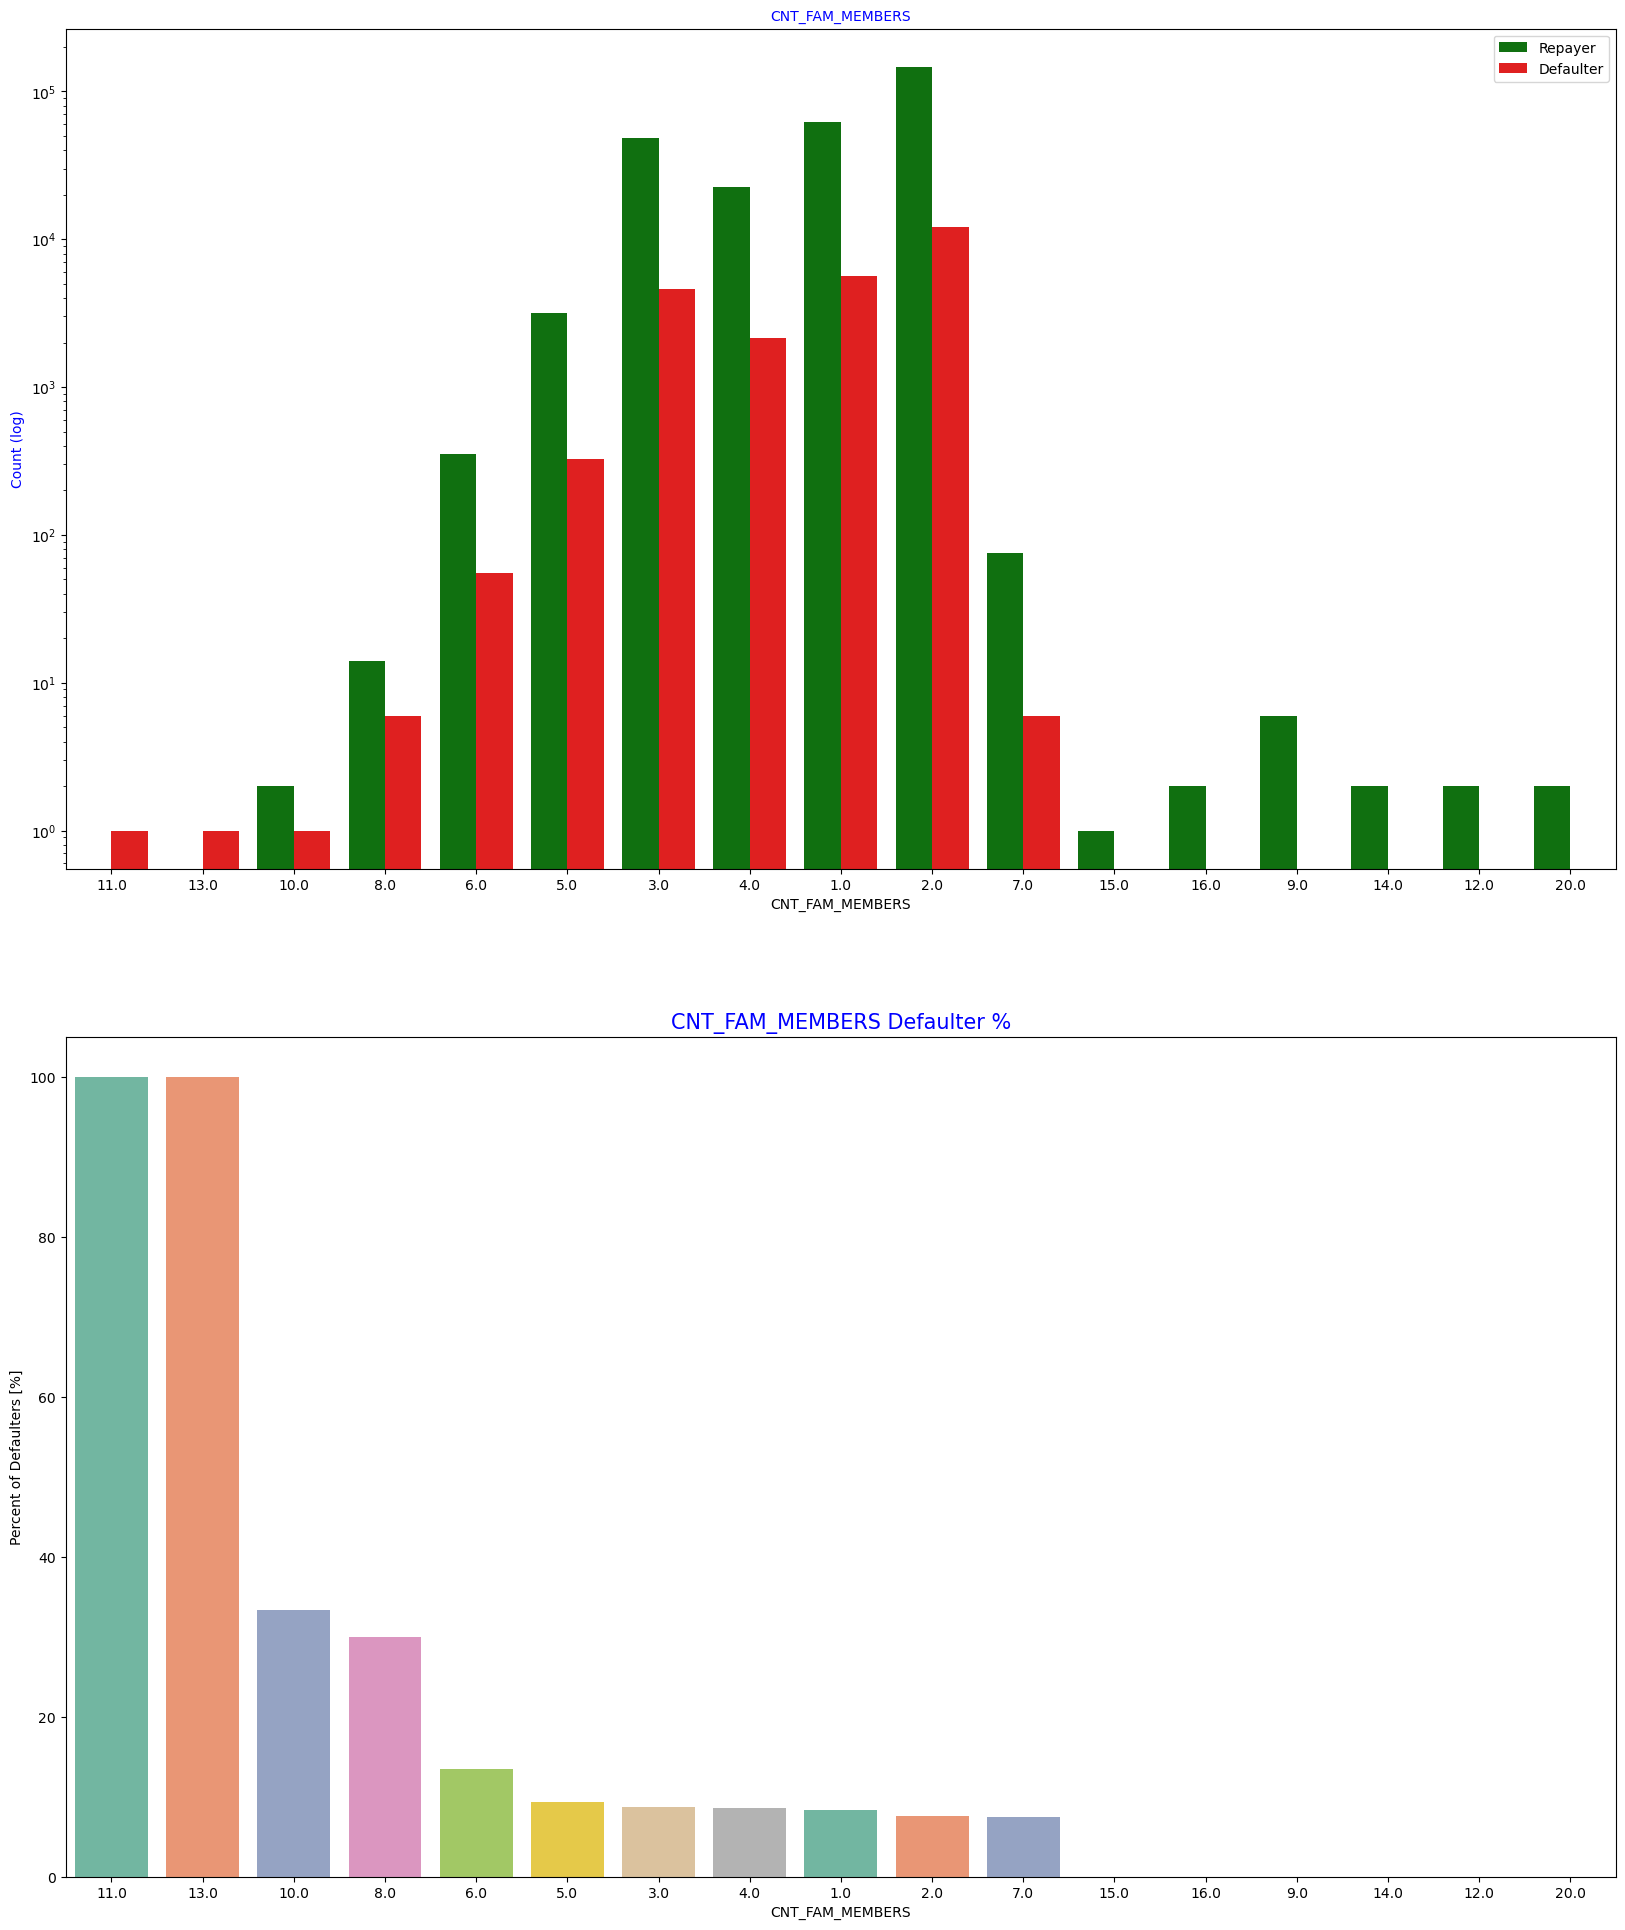

In [57]:
# Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

> Inferences:
Family member follows the same trend as children where having more family members increases the risk of defaulting

> *Categorical Bi/Multivariate Analysis*

In [58]:
df.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

,count,mean,std,min,25%,50%,75%,max
NAME_INCOME_TYPE,,,,,,,,
Businessman,10.0,652500.000000,627226.035812,180000.0,225000.0,495000.0,843750.0,2250000.0
Commercial associate,71617.0,202955.327289,147974.151536,26550.0,135000.0,180000.0,225000.0,18000090.0
Maternity leave,5.0,140400.000000,126856.907577,49500.0,67500.0,90000.0,135000.0,360000.0
Pensioner,55362.0,136401.292273,76650.331247,25650.0,90000.0,117000.0,166500.0,2250000.0
State servant,21703.0,179737.969506,100880.579748,27000.0,112500.0,157500.0,225000.0,3150000.0
Student,18.0,170500.000000,106644.682171,81000.0,112500.0,157500.0,178875.0,562500.0
Unemployed,22.0,110536.363636,88055.079059,26550.0,54000.0,78750.0,135000.0,337500.0
Working,158774.0,163169.889223,307577.685943,25650.0,112500.0,135000.0,202500.0,117000000.0


> The code uses the groupby function in pandas to group the data in the DataFrame dataframe based on the values in the column "NAME_INCOME_TYPE". It then calculates summary statistics (descriptive statistics) for the "AMT_INCOME_TOTAL" column within each group.

NameError: name 'col' is not defined

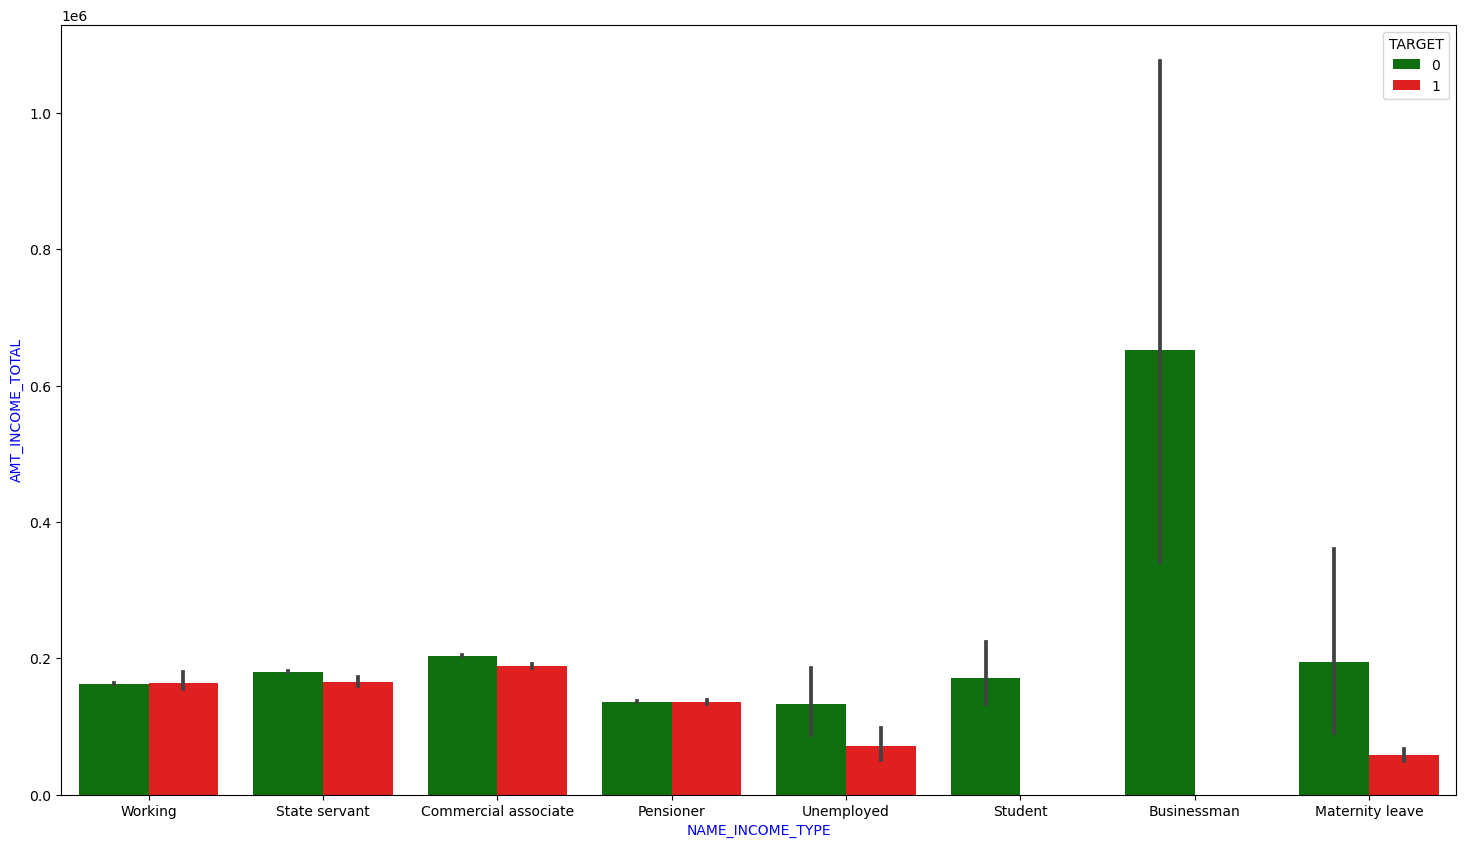

In [59]:
# Income type vs Income Amount Range
bivariate_bar("NAME_INCOME_TYPE","AMT_INCOME_TOTAL",df,"TARGET",(18,10))

> Inferences:
It can be seen that business man's income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a business man could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

**Bifurcating the dataframe based on Target value 0 and 1 for correlation and other analysis**

In [60]:
# Bifurcating the applicationDF dataframe based on Target value 0 and 1 for correlation and other analysis
cols_for_correlation = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']


Repayer_df = df.loc[df['TARGET']==0, cols_for_correlation] # Repayers
Defaulter_df = df.loc[df['TARGET']==1, cols_for_correlation] # Defaulters

**Correlation between numeric variable**

In [61]:
# Getting the top 10 correlation for the Repayers data
corr_repayer = Repayer_df.corr()
corr_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool))
corr_df_repayer = corr_repayer.unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs() 
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True) 
corr_df_repayer.head(10)

,VAR1,VAR2,Correlation
122,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
371,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950149
300,CNT_FAM_MEMBERS,CNT_CHILDREN,0.878571
495,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.861861
588,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_WORK_CITY,0.830381
123,AMT_GOODS_PRICE,AMT_ANNUITY,0.776686
92,AMT_ANNUITY,AMT_CREDIT,0.771309
335,REGION_RATING_CLIENT,REGION_POPULATION_RELATIVE,0.539005
365,REGION_RATING_CLIENT_W_CITY,REGION_POPULATION_RELATIVE,0.537301
464,REG_REGION_NOT_WORK_REGION,REG_REGION_NOT_LIVE_REGION,0.446101


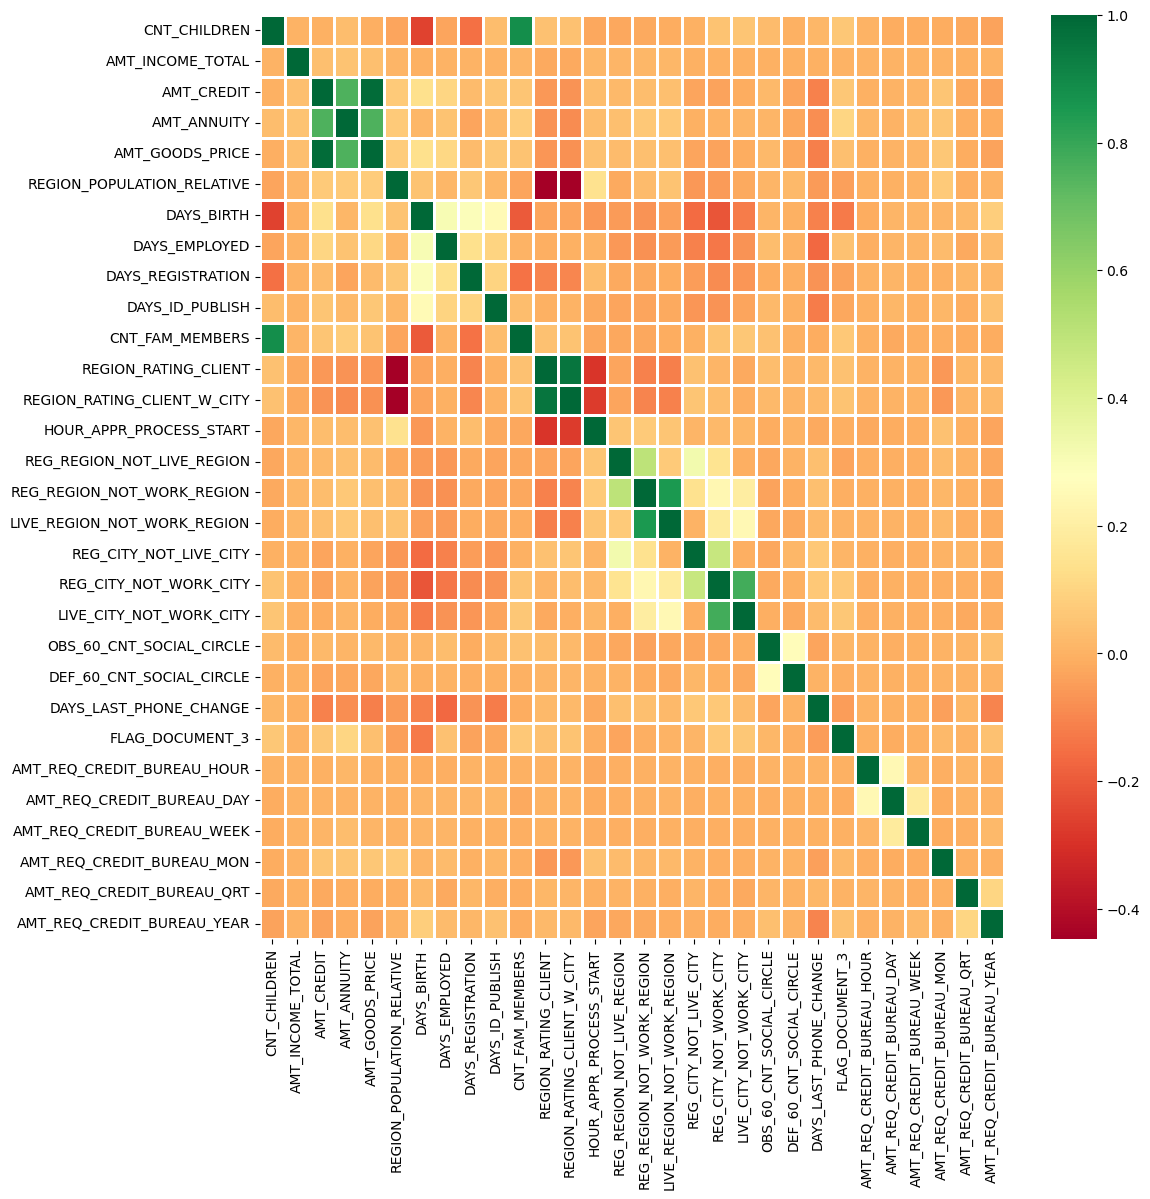

In [62]:
fig = plt.figure(figsize=(12,12))
ax = sns.heatmap(Defaulter_df.corr(), cmap="RdYlGn",annot=False,linewidth =1)

> Inferences:
* Credit amount is highly correlated with amount of goods price which is same as repayers.
* But the loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)
* We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).
* There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.
* Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.
* There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)

**Numerical Univariate Analysis**

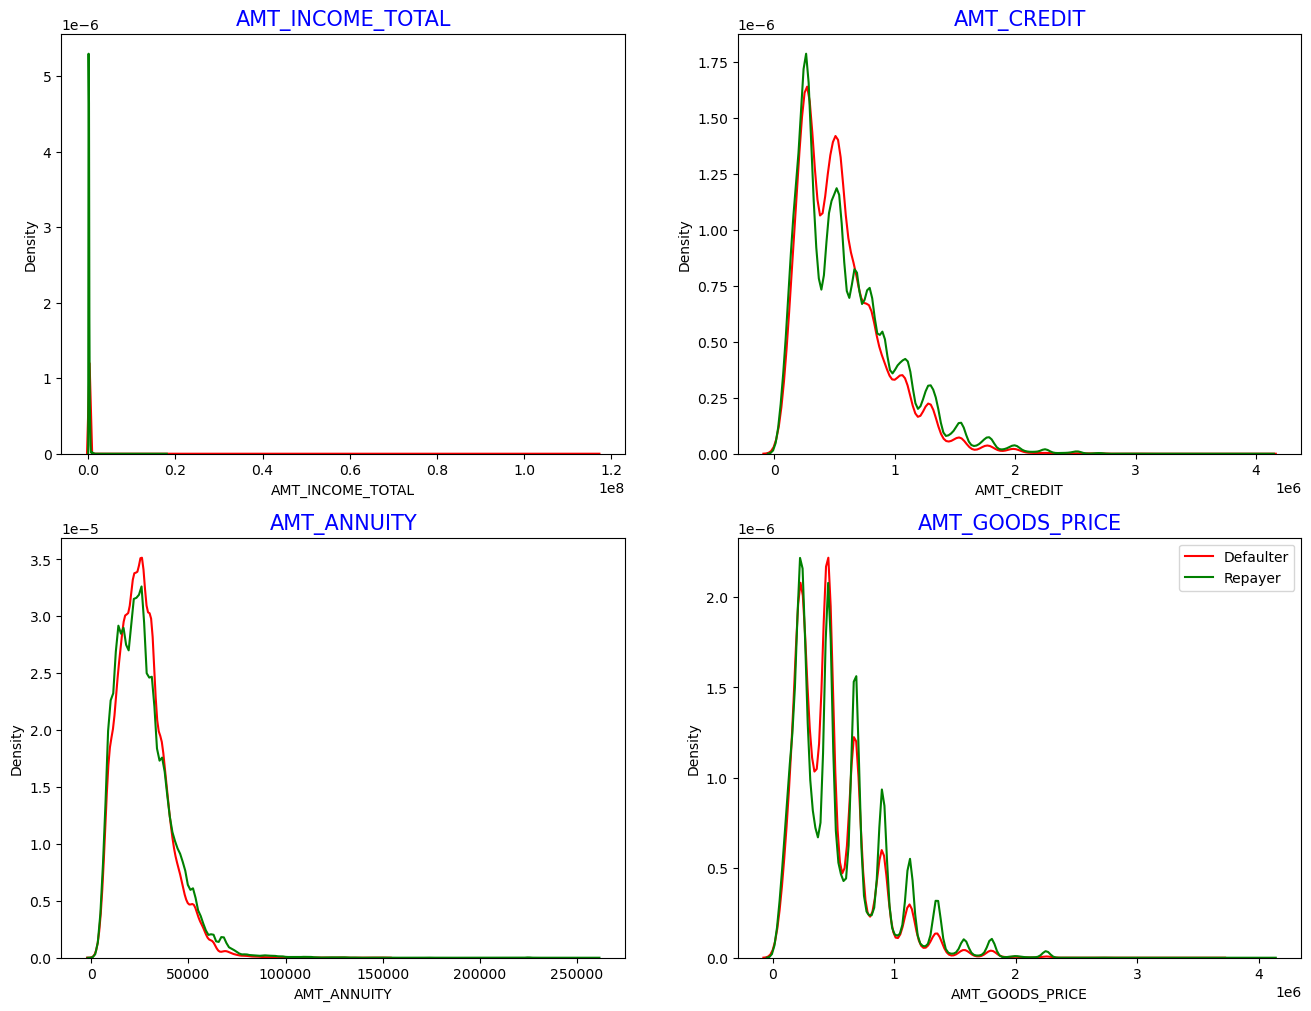

In [63]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']]

fig = plt.figure(figsize=(16,12))

for i in enumerate(amount):
    plt.subplot(2,2,i[0]+1)
    sns.distplot(Defaulter_df[i[1]], hist=False, color='r',label ="Defaulter")
    sns.distplot(Repayer_df[i[1]], hist=False, color='g', label ="Repayer")
    plt.title(i[1], fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'}) 
    
plt.legend()

plt.show() 

> Inferences:
* Most no of loans are given for goods price below 10 lakhs
* Most people pay annuity below 50000 for the credit loan
* Credit amount of the loan is mostly less then 10 lakhs
* The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

**Numerical Bivariate Analysis**

<Figure size 1500x600 with 0 Axes>

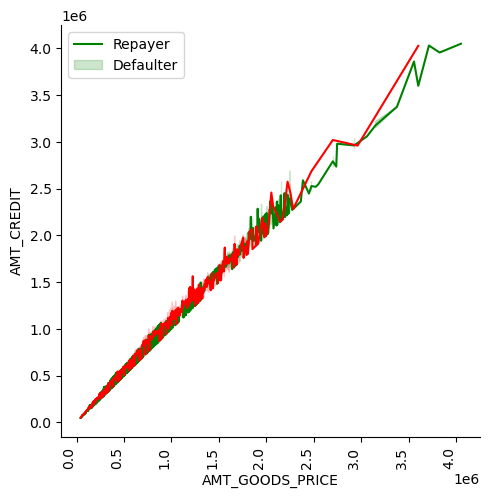

In [64]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_rel('AMT_GOODS_PRICE','AMT_CREDIT',df,"TARGET", "line", ['g','r'], False,(15,6))

> Inferences:
When the credit amount goes beyond 3M, there is an increase in defaulters.

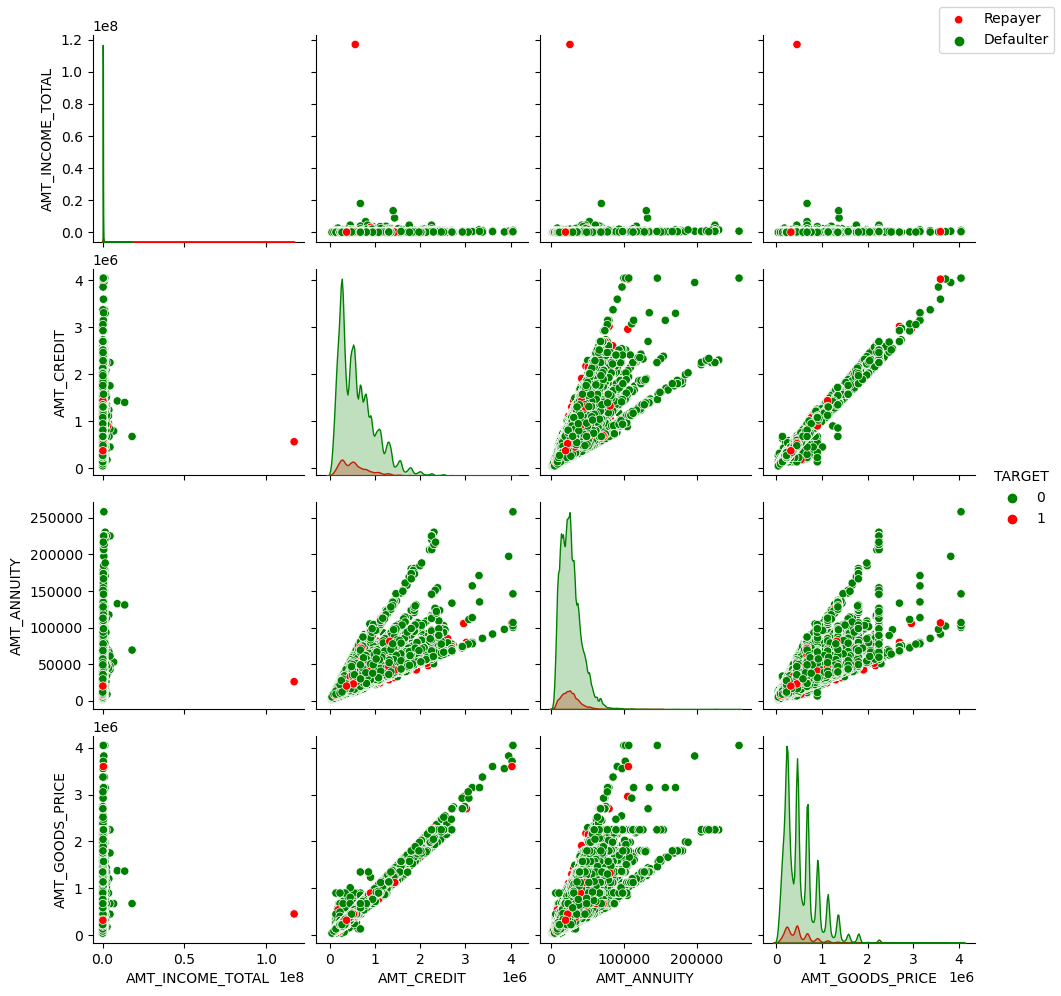

In [65]:
# Plotting pairplot between amount variable to draw reference against loan repayment status
amount = df[[ 'AMT_INCOME_TOTAL','AMT_CREDIT',
                         'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]
ax= sns.pairplot(amount,hue="TARGET",palette=["g","r"])
ax.fig.legend(labels=['Repayer','Defaulter'])
plt.show()

> Inferences:
* When amt_annuity >15000 amt_goods_price> 3M, there is a lesser chance of defaulters
* AMT_CREDIT and AMT_GOODS_PRICE are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line
* There are very less defaulters for AMT_CREDIT >3M
* Inferences related to distribution plot has been already mentioned in previous distplot graphs inferences section

# Preprocessing

**Encoding for Categorical dataframe**

In [66]:
one_hot_encoded_data = pd.get_dummies(categorical_df)
one_hot_encoded_data.head()

,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZATION_TYPE_Insurance,ORGANIZATION_TYPE_Kindergarten,ORGANIZATION_TYPE_Legal Services,ORGANIZATION_TYPE_Medicine,ORGANIZATION_TYPE_Military,ORGANIZATION_TYPE_Mobile,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_M

In [67]:
combined_data = pd.concat([one_hot_encoded_data, numerical_df], axis=1)

# Modelling

***Logistic Regression***

In [134]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

Feature Selections(X)

In [136]:
X = combined_data.drop(['TARGET', 'AMT_GOODS_PRICE','SK_ID_CURR'], axis=1)

TRAIN-TEST SPLIT

In [137]:
y = df['TARGET']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [168]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [169]:
#Use the trained model to make predictions on the test set.
y_pred = model.predict(X_test)

In [170]:
f1_scores_lr1 = []
accuracies_lr1 = []
precisions_lr1= []
recall_lr1 = []
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.15, 0.2,
                  0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    recall = recall_score(y_test, Y_test_pred[1].values,zero_division=0)
    precision = precision_score(y_test, Y_test_pred[1].values,zero_division=0)
    accuracy = accuracy_score(y_test, Y_test_pred[1].values)
    f1 = round((2 * precision * recall)/(precision + recall), 5)
    f1_scores_lr1.append(f1)
    accuracies_lr1.append(accuracy)
    recall_lr1.append(recall)
    precisions_lr1.append(precision)




df_lr1 = pd.DataFrame(data={"Accuracy_lr": accuracies_lr1,"Recall_lr": recall_lr1,
                        "Precision_lr": precisions_lr1,"F1_lr": f1_scores_lr1})
# because of zero devision there are some null values so let's substitute them with 0's
df_lr1.fillna(0, inplace=True)
df_lr1["Threshold"] = threshold_list
df_lr1.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy_lr,Recall_lr,Precision_lr,F1_lr,Threshold
0,0.084012,0.998376,0.080299,0.148640,0.020000
1,0.112531,0.977263,0.081202,0.149950,0.030000
2,0.184755,0.930978,0.084323,0.154640,0.040000
3,0.289027,0.858912,0.089520,0.162140,0.050000
4,0.398143,0.766342,0.095232,0.169410,0.060000
5,0.497260,0.673163,0.101637,0.176610,0.070000
6,0.578817,0.579578,0.106977,0.180620,0.080000
7,0.701657,0.416768,0.117120,0.182850,0.100000
8,0.843439,0.162201,0.126805,0.142340,0.150000
9,0.902281,0.039992,0.133288,0.061520,0.200000


In [180]:
threshold = 0.07   # Adjust as needed
y_pred = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)


              precision    recall  f1-score   support

           0       0.94      0.48      0.64     56577
           1       0.10      0.67      0.18      4926

    accuracy                           0.50     61503
   macro avg       0.52      0.58      0.41     61503
weighted avg       0.88      0.50      0.60     61503



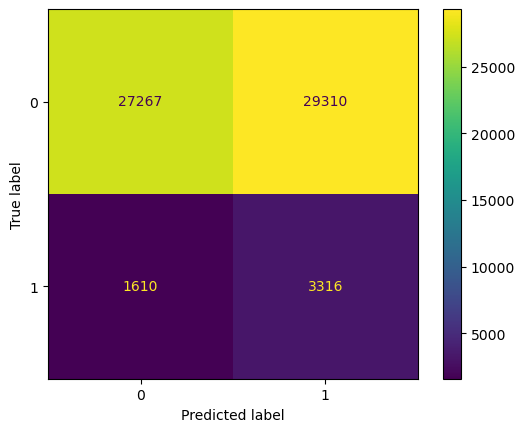

In [181]:
print(classification_report(y_test, y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
disp.plot()
plt.show()

> Here's a breakdown of the confusion matrix:

**True Positive (TP)**: The number of instances that are correctly predicted as positive (belonging to the positive class).

**True Negative (TN)**: The number of instances that are correctly predicted as negative (belonging to the negative class).

**False Positive (FP)**: The number of instances that are incorrectly predicted as positive (predicted as positive but actually belonging to the negative class). Also known as a Type I error.

**False Negative (FN)**: The number of instances that are incorrectly predicted as negative (predicted as negative but actually belonging to the positive class). Also known as a Type II error.

*Hyperparameter tuning 1.0*

In [182]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X,y,test_size = 0.2)

In [183]:

 model_lr = LogisticRegression(random_state=444, solver="saga", max_iter=300)

 model_params = {
     'C': [100, 10, 1.0, 0.1, 0.01]
 }

 model_lr = GridSearchCV(model_lr, model_params, cv=3, verbose=True,
                         scoring='balanced_accuracy')

 model_lr = model_lr.fit(X2_train, y2_train)
 print(model_lr.best_params_)
 print(model_lr.best_score_)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 100}
0.5


In [ ]:
model_lr = LogisticRegression(random_state=444, solver="saga",
                              max_iter=300, C=0.01)
model_lr.fit(X2_train, y2_train)
y_hat_lr = model_lr.predict(X2_test)

In [ ]:
f1_scores_lr2 = []
accuracies_lr2 = []
precisions_lr2= []
recall_lr2 = []
pred_proba_df = pd.DataFrame(model_lr.predict_proba(X2_test))
threshold_list = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.15, 0.2,
                  0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    recall = recall_score(y2_test, Y_test_pred[1].values,zero_division=0)
    precision = precision_score(y2_test, Y_test_pred[1].values,zero_division=0)
    accuracy = accuracy_score(y2_test, Y_test_pred[1].values)
    f1 = round((2 * precision * recall)/(precision + recall), 5)
    f1_scores_lr1.append(f1)
    accuracies_lr1.append(accuracy)
    recall_lr1.append(recall)
    precisions_lr1.append(precision)




df_lr2 = pd.DataFrame(data={"Accuracy_lr": accuracies_lr2,"Recall_lr": recall_lr2,
                        "Precision_lr": precisions_lr2,"F1_lr": f1_scores_lr2})
# because of zero devision there are some null values so let's substitute them with 0's
df_lr2.fillna(0, inplace=True)
df_lr2["Threshold"] = threshold_list
df_lr2.style.highlight_max(color = 'lightgreen', axis = 0)

              precision    recall  f1-score   support

           0       0.94      0.48      0.64     56577
           1       0.10      0.67      0.18      4926

    accuracy                           0.50     61503
   macro avg       0.52      0.58      0.41     61503
weighted avg       0.88      0.50      0.60     61503



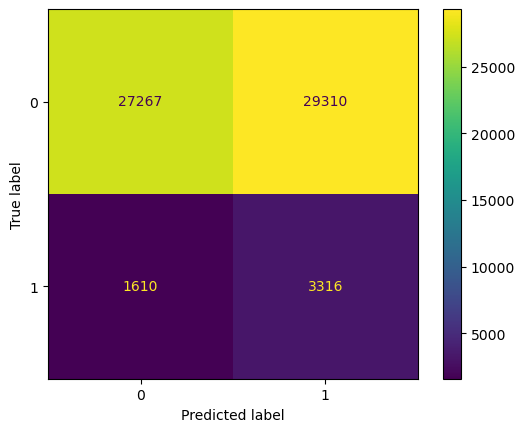

In [176]:
threshold = 0.07   # Adjust as needed
y_hat_lr = (model_lr.predict_proba(X2_test)[:, 1] > threshold).astype(int)

disp = ConfusionMatrixDisplay(confusion_matrix(y2_test, y_hat_lr))
disp.plot()
plt.show()


**Handling Imbalanced data**

In [146]:
from imblearn.over_sampling import SMOTE
from collections import Counter
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 282686), (1, 282686)]


**Hyperparameter Tuning**

In [147]:
X_resampled_train,X_resampled_test,y_resampled_train,y_resampled_test = train_test_split(X,y,test_size = 0.2)

In [148]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression


In [149]:
#Hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],   # Example values for regularization strength
    'penalty': ['l1', 'l2'],       # Example values for penalty
    'class_weight': [None, 'balanced']
}

**Initiating model**

In [150]:
model = LogisticRegression()

**Instantiate GridSearchCV**

In [151]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1', cv=3)


**Perform GridSearchCV**

In [152]:
grid_search.fit(X_resampled_train, y_resampled_train)


GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']},
             scoring='f1')

**Get Best Parameters and Best Model**

In [153]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


**Cutoff point**

*Choosing best threshold based on graph*

In [154]:
f1_scores_lr = []
accuracies_lr = []
precisions_lr = []
recall_lr = []
pred_proba_df = pd.DataFrame(grid_search.predict_proba(X_resampled_test))
threshold_list = [0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.1, 0.15, 0.2,
                  0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

for i in threshold_list:
    Y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    recall = recall_score(y_resampled_test, Y_test_pred[1].values,zero_division=0)
    precision = precision_score(y_resampled_test, Y_test_pred[1].values,zero_division=0)
    accuracy = accuracy_score(y_resampled_test, Y_test_pred[1].values)
    f1 = round((2 * precision * recall)/(precision + recall), 5)
    f1_scores_lr.append(f1)
    accuracies_lr.append(accuracy)
    recall_lr.append(recall)
    precisions_lr.append(precision)




df_lr = pd.DataFrame(data={"Accuracy_lr": accuracies_lr,"Recall_lr": recall_lr,
                        "Precision_lr": precisions_lr,"F1_lr": f1_scores_lr})
# because of zero devision there are some null values so let's substitute them with 0's
df_lr.fillna(0, inplace=True)
df_lr["Threshold"] = threshold_list
df_lr.style.highlight_max(color = 'lightgreen', axis = 0)

,Accuracy_lr,Recall_lr,Precision_lr,F1_lr,Threshold
0,0.082191,1.000000,0.082191,0.151900,0.020000
1,0.082191,1.000000,0.082191,0.151900,0.030000
2,0.082191,1.000000,0.082191,0.151900,0.040000
3,0.082191,1.000000,0.082191,0.151900,0.050000
4,0.082191,1.000000,0.082191,0.151900,0.060000
5,0.082191,1.000000,0.082191,0.151900,0.070000
6,0.082191,1.000000,0.082191,0.151900,0.080000
7,0.082191,1.000000,0.082191,0.151900,0.100000
8,0.082191,1.000000,0.082191,0.151900,0.150000
9,0.082191,1.000000,0.082191,0.151900,0.200000


> The thresold is chosen following a conservative strategy by basing it on the recall precentage

In [156]:
threshold = 0.2   # Adjust as needed
y_resampled_pred = (grid_search.predict_proba(X_test)[:, 1] > threshold).astype(int)


**Resampled model**

In [131]:
y_resampled_pred = grid_search.predict(X_resampled_test)


              precision    recall  f1-score   support

           0       0.94      0.59      0.73     56561
           1       0.10      0.54      0.17      4942

    accuracy                           0.59     61503
   macro avg       0.52      0.57      0.45     61503
weighted avg       0.87      0.59      0.68     61503



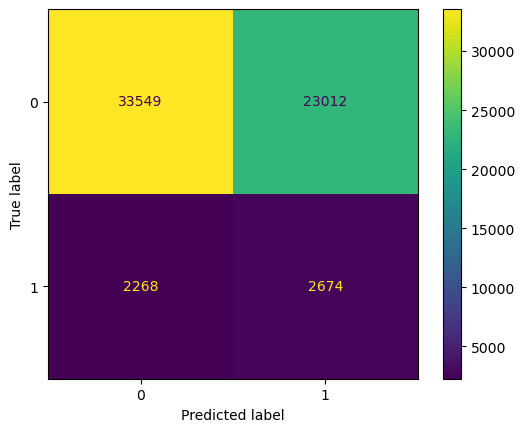

In [132]:

print(classification_report(y_resampled_test, y_resampled_pred))

disp = ConfusionMatrixDisplay(confusion_matrix(y_resampled_test, y_resampled_pred))
disp.plot()
plt.show()


***XGBoost***

In [103]:
from xgboost import XGBClassifier

In [104]:
model_xgb = XGBClassifier(random_state=444, verbosity=0, n_estimators=200, tree_method='hist')
model_xgb.fit(X_train, y_train)
y_hat_xgb = model_xgb.predict(X_test)

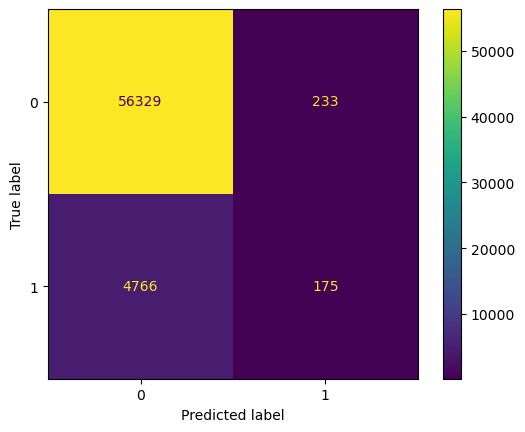

In [105]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_hat_xgb))
disp.plot()
plt.show()

In [106]:
print(classification_report(y_test, y_hat_xgb))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56562
           1       0.43      0.04      0.07      4941

    accuracy                           0.92     61503
   macro avg       0.68      0.52      0.51     61503
weighted avg       0.88      0.92      0.89     61503



# Conclusion 

With accuracy of 50%, recall of 67% and precision of 10% the chosen threshold is 0.07 and that the defaulters predicted correctly are reasonable 